#Analisis de Canciones de Gustavo Cerati con NLP

# **Sección 1: Presentación del Corpus**

#Trabajo Integrador : Contexto

En este cuaderno, voy a aplicar todos los contenidos vistos hasta el momento en la materia **Procesamiento del Lenguaje Natural**, a cargo del profesor **Matias Barreto**.

Mi propósito es tratar de integrar los contenidos teóricos y prácticos de la materia, con el fin de realizar un análisis de texto aplicando los contenidos vistos en estas primeras semanas.

Los bloques de temas que abordaré incluyen:

000 - Introducción a la materia y al PLN:

* Web Scrapping
* Gradio
* Beautifoul Soup
* Trafilatura

001 - Python para Lingüística Computacional

* Estructuras Avanzadas y Aplicaciones en PLN

002 - De la sopa de letras al análisis lingüístico (con Spacy)

* Spacy
* Watermark
* Bag of Words
* TF-IDF

004 - Vectorización de Texto y Text Mining

* Gráficos de Frecuencias: Primera Aproximación Analítica
* Apply - Transformación Vectorizada de Corpus
* Serialización de Datos con Pickle
* Word Clouds

005 - De Text Mining a Representaciones Semánticas
* Word To Vect
* FastText
* GloVe
* Embeddings


# Trabajo Integrador :  Temática



En este trabajo, voy a obtener la  discografía de *Gustavo Cerati* mediante la técnica Web Scrapping. La misma generará un corpus de 70 canciones que van desde el año 1993 al 2009.
La fuente de la información proviene de la web letras.com



Como fan de Cerati, elegí analizar sus canciones ya que son lertras con muchos significados, desde lo superficial y mundano a lo profundo y etéreo, haciendo escala en metaforas relacionadas al amor, muerte, vida y lealtad.

En este análisis, me gustaría poder ver más allá de sus letras, en qué momento personal se encontraba Gustavo Cerati al momento de componer sus discos.

El propósito de este proyecto es analizar la similitud o no similitud entre las canciones de los discos de Gustavo Cerati.

Al momento de hacer la recoleccion de los datos, me pareció interesante hacer web scrapping.

Decidi ir por la discografía como solista ya que fué un hito en su carrera luego de la salida de Soda Stereo.

Al momento de aplicar la técnica, tuve que aprender sobre el formato HTML para poder identificar los párrafos en donde se encontraban éstas letras.

[HTML Conceptos Básicos](https://developer.mozilla.org/es/docs/Learn_web_development/Getting_started/Your_first_website/Creating_the_content/)

Con un poco de ayuda del asistente de IA y leyendo la documentación, pude sortear el primer obstáculo.

Para poder empezar cualquier análisis, tengo que llevar los textos a números, de forma tal que me puedan aportar información estadística, haré un tratamiento de los datos, tal como limpieza y normalización de las letras, la creación de corpus, vectorización del mismo para luego dar paso al análisis central que es saber cuán parecidas o no son las temáticas de los discos donde se incluyen éstas canciones, siempre sobre el total de las 70 canciones del corpus:

70 documentos x 1659 palabras únicas

Para ello, se haran nubes de palabras, conteo de palabras más frecuentes, un análisis estadístico de palabras únicas, entre otras técnicas.

El resultado, será puesto a prueba por una interfaz donde el usuario podra ingresar una palabra y ver el resultado en un gráfico de frecuencias por disco.

# **Sección 2: Preprocesamiento**

#Importación de Librerias

Para consolidar una buena práctica, agregamos todas las librerias que vamos a usar en la primer celda de código para luego ir avanzando con el análisis

In [152]:
%pip install trafilatura

import trafilatura
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pickle
import string
import requests
from bs4 import BeautifulSoup
from collections import Counter
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import nltk
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt
import spacy
from datetime import datetime
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go
from spacy import displacy
import gradio as gr
import string
import unicodedata
import ipywidgets as widgets
from IPython.display import display
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from ipywidgets import interact
import plotly.express as px
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import gensim
from gensim.models import Word2Vec

In [154]:
import trafilatura
import sklearn
import requests
import bs4
import wordcloud
import numpy
import PIL
import nltk
import matplotlib
import spacy
import pandas
import plotly
import gradio
import textblob
import gensim
from importlib.metadata import version

print("trafilatura:", trafilatura.__version__)
print("scikit-learn:", sklearn.__version__)
print("requests:", requests.__version__)
print("beautifulsoup4:", bs4.__version__)
print("wordcloud:", wordcloud.__version__)
print("numpy:", numpy.__version__)
print("Pillow:", PIL.__version__)
print("nltk:", nltk.__version__)
print("matplotlib:", matplotlib.__version__)
print("spacy:", spacy.__version__)
print("pandas:", pandas.__version__)
print("plotly:", plotly.__version__)
print("gradio:", gradio.__version__)
print("gensim:", gensim.__version__)
print("TextBlob:", version("textblob"))




trafilatura: 2.0.0
scikit-learn: 1.6.1
requests: 2.32.4
beautifulsoup4: 4.13.5
wordcloud: 1.9.4
numpy: 1.26.4
Pillow: 11.3.0
nltk: 3.9.1
matplotlib: 3.10.0
spacy: 3.8.7
pandas: 2.2.2
plotly: 5.24.1
gradio: 5.44.1
gensim: 4.3.3
TextBlob: 0.19.0


#Web Scrapping

Elegí esta técnica para poder obtener las letras de las canciones que se encuentran publicados en la pagina Lyrics.

Para esta parte del trabajo tuve que decidir entre Trafilatura o BeautifoulSoup.

Fui por la tecnica de scraping usando request.

Si bien implica algo de conocimiento de HTML, con un poco de ayuda del asistente lo voy a intentar

Aqui hay un breve resumen de lo más importante de HTML

[   https://developer.mozilla.org/es/docs/Learn_web_development/Getting_started/Your_first_website/Creating_the_content
](https://)

Importo la librería requests, que se usa para hacer peticiones HTTP (por ejemplo, abrir una página web y traer su contenido)

Importa BeautifulSoup desde la librería bs4.

BeautifulSoup sirve para analizar (parsear) el HTML de una página web y poder extraer información de manera sencilla (por ejemplo, títulos, párrafos, links, etc.).

Aqui elijo la web del artista para probar la técnica.

In [74]:
url = "https://www.letras.com/gustavo-cerati/"
contenido = requests.get(url).text

Guarda en la variable url la dirección web (el link) de la página que queremos analizar.

Usa requests.get(url) para hacer una petición HTTP GET a la página web.

Eso devuelve la respuesta completa (código, cabeceras, etc.).

Con .text se extrae solo el contenido en texto del HTML de esa página.

Ese HTML se guarda en la variable contenido.

In [75]:
print(contenido)

<!doctype HTML><html data-locale="es-es" data-platform="desktop" data-theme="light" dir="ltr" lang="es"><head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#"><meta charset="UTF-8"><meta name="format-detection" content="telephone=no"><meta name="theme-color" content="#c2c800"><meta name="include_mode" content="async"><meta name="viewport" content="width=device-width, initial-scale=1.0"><link rel="manifest" href="/manifest.json"><title>Gustavo Cerati - LETRAS.COM (162 canciones)</title><meta content="¡Mira las letras de Gustavo Cerati y escucha &#34;Vivo&#34;,  &#34;Crimen&#34;,  &#34;Amor Amarillo&#34;,  &#34;Adiós&#34;,  &#34;Bocanada&#34;,  &#34;Puente&#34;,  &#34;Té Para Tres&#34; y muchas otras canciones!" name="description"><meta content="letras de canciones, Gustavo Cerati letras, canciones, letra de canción, letra, letras de canciones, subtítulos, videos" name="keywords"><link rel="canonical" href="https://www.letras.com/gustavo-cerati/"><link rel="alternate" hreflang="es

Muestra en pantalla lo que guardamos en la variable contenido.

Como contenido es el HTML completo de la página web, al imprimirlo vamos a ver el código fuente: etiquetas html, head, body, div, p, etc.

In [76]:
soup = BeautifulSoup(contenido, "html.parser")

BeautifulSoup(...) recibe el contenido HTML (la variable contenido).

El segundo parámetro "html.parser" le indica qué analizador usar para interpretar el HTML. En este caso, el parser de Python que viene por defecto.

El resultado (soup) es un objeto especial que organiza el HTML como un árbol, lo que nos permite buscar, recorrer y extraer etiquetas o texto de manera sencilla.

In [77]:
parrafos = soup.find_all("p")

Esta línea hace la primera extracción real de contenido:

.find_all("p") busca dentro del objeto soup todas las etiquetas < p > del HTML.

Las etiquetas < p > en HTML corresponden a párrafos de texto.

Devuelve una lista de objetos BeautifulSoup, cada uno representando un párrafo.

Esa lista se guarda en la variable parrafos.

In [78]:
print(parrafos)

[<p class="textStyle-primary">Géneros musicales</p>, <p class="textStyle-primary">Canciones</p>, <p class="textStyle-primary">Artistas</p>, <p class="textStyle-primary">Álbumes</p>, <p class="textStyle-primary">Playlists</p>, <p class="textStyle-primary">Blog</p>, <p class="textStyle-primary">Enviar letras, traducirlas y más</p>, <p class="contextualPlanModal-subtitle font --copy --size14 contextualPlanModal-spaceBottom">Disfruta de tus canciones sin molestias</p>, <p>Paga una vez y <strong class="font --base --strong --size12">usa durante todo un año</strong></p>, <p class="contextualPlanCard-header-text isLoading"><span class="header-text-currency font --base --strong --size10">R$</span> <span class="header-text-priceInteger font --base --strong --size24"></span> <span class="header-text-priceCents font --base --strong --size24"></span> <span class="header-text-period font --base --strong --size14">/ano</span></p>, <p class="contextualPlanCard-description font --base --regular --size

Ahora si, pasamos al web scrapping de las canciones, en la que armo una lista de diccionarios en donde ordeno por las variables autor, disco, cancion, año, urls, elemento y clase.


Cada diccionario representa a un disco y contiene información asociada a sus canciones:

"autor" → el nombre del artista.

"disco" : el nombre del disco

"cancion" → una lista con los títulos de las canciones de ese artista.

"urls" → una lista con las direcciones web donde están las letras.

"elemento" → la etiqueta HTML en la que está contenido el texto de la cancion (por ejemplo, div).

"clase" → el atributo class de esa etiqueta HTML, para poder identificar el bloque de texto correcto cuando hagas web scraping.

In [79]:
paginas_canciones_cerati = [
 {
    'autor': 'Gustavo Cerati',
    'disco': 'Fuerza Natural',
    'cancion': ['Fuerza Natural','Deja Vu', 'Magia','Amor Sin Rodeos','Tracción A Sangre','Desatre','Rapto','Cactus','Naturaleza Muerta','Dominó','Sal','Convoy','He Visto A Lucy','Numeral'],
    'año': '2009',
    'urls': ['https://www.letras.com/gustavo-cerati/1550675/#album:fuerza-natural-2009',
             'https://www.letras.com/gustavo-cerati/1509916/#album:fuerza-natural-2009',
             'https://www.letras.com/gustavo-cerati/1550674/#album:fuerza-natural-2009',
             'https://www.letras.com/gustavo-cerati/1550673/#album:fuerza-natural-2009',
             'https://www.letras.com/gustavo-cerati/1550672/#album:fuerza-natural-2009',
             'https://www.letras.com/gustavo-cerati/1550671/#album:fuerza-natural-2009',
             'https://www.letras.com/gustavo-cerati/1550670/#album:fuerza-natural-2009',
             'https://www.letras.com/gustavo-cerati/1550668/#album:fuerza-natural-2009',
             'https://www.letras.com/gustavo-cerati/1550669/#album:fuerza-natural-2009',
             'https://www.letras.com/gustavo-cerati/1550667/#album:fuerza-natural-2009',
             'https://www.letras.com/gustavo-cerati/1550665/#album:fuerza-natural-2009',
             'https://www.letras.com/gustavo-cerati/1550666/#album:fuerza-natural-2009',
             'https://www.letras.com/gustavo-cerati/1550663/#album:fuerza-natural-2009',
             'https://www.letras.com/gustavo-cerati/1550664/#album:fuerza-natural-2009'],
    'elemento': 'div',
    'clase': 'lyric-original'
},

 {
    'autor': 'Gustavo Cerati',
    'disco': 'Ahí Vamos',
    'cancion': ['Al Fin Sucede','La Excepción','Uno Entre Mil','Caravana','Adios','Me Quedo Aquí','Lago En El Cielo','Dios Nos Libre','Otra Piel','Medium','Bomba De Tiempo','Crímen','Jugo De Luna'],
    'año': '2006',
    'urls': ['https://www.letras.com/gustavo-cerati/535870/#album:ahi-vamos-2006',
             'https://www.letras.com/gustavo-cerati/535876/#album:ahi-vamos-2006',
             'https://www.letras.com/gustavo-cerati/uno-entre-mil/#album:ahi-vamos-2006',
             'https://www.letras.com/gustavo-cerati/535872/#album:ahi-vamos-2006',
             'https://www.letras.com/gustavo-cerati/535869/#album:ahi-vamos-2006',
             'https://www.letras.com/gustavo-cerati/535878/#album:ahi-vamos-2006',
             'https://www.letras.com/gustavo-cerati/535877/#album:ahi-vamos-2006',
             'https://www.letras.com/gustavo-cerati/535874/#album:ahi-vamos-2006',
             'https://www.letras.com/gustavo-cerati/535880/#album:ahi-vamos-2006',
             'https://www.letras.com/gustavo-cerati/535879/#album:ahi-vamos-2006',
             'https://www.letras.com/gustavo-cerati/535871/#album:ahi-vamos-2006',
             'https://www.letras.com/gustavo-cerati/535873/#album:ahi-vamos-2006',
             'https://www.letras.com/gustavo-cerati/535875/#album:ahi-vamos-2006'],

    'elemento': 'div',
    'clase': 'lyric-original'
 },

 {
    'autor': 'Gustavo Cerati',
    'disco': 'Siempre Es Hoy',
    'cancion': ['Cosas Imposibles','No Te Creo','Artefacto','Naci Para Esto','Amo Dejarte Asi','Tu Cicatriz En Mi','Señales Luminosas','Karaoke','Sulky','Casa','Camuflaje','Altar','Torre De Marfil','Fantasma','Vivo','Sudestada','Especie'],
    'año': '2002',
    'urls': ['https://www.letras.com/gustavo-cerati/162779/#album:siempre-es-hoy-2002',
             'https://www.letras.com/gustavo-cerati/257015/#album:siempre-es-hoy-2002',
             'https://www.letras.com/gustavo-cerati/400908/#album:siempre-es-hoy-2002',
             'https://www.letras.com/gustavo-cerati/257014/#album:siempre-es-hoy-2002',
             'https://www.letras.com/gustavo-cerati/400905/#album:siempre-es-hoy-2002',
             'https://www.letras.com/gustavo-cerati/257019/#album:siempre-es-hoy-2002',
             'https://www.letras.com/gustavo-cerati/257016/#album:siempre-es-hoy-2002',
             'https://www.letras.com/gustavo-cerati/76846/#album:siempre-es-hoy-2002',
             'https://www.letras.com/gustavo-cerati/84718/#album:siempre-es-hoy-2002',
             'https://www.letras.com/gustavo-cerati/257011/#album:siempre-es-hoy-2002',
             'https://www.letras.com/gustavo-cerati/257010/#album:siempre-es-hoy-2002',
             'https://www.letras.com/gustavo-cerati/257009/#album:siempre-es-hoy-2002',
             'https://www.letras.com/gustavo-cerati/257018/#album:siempre-es-hoy-2002',
             'https://www.letras.com/gustavo-cerati/257013/#album:siempre-es-hoy-2002',
             'https://www.letras.com/gustavo-cerati/400930/#album:siempre-es-hoy-2002',
             'https://www.letras.com/gustavo-cerati/257017/#album:siempre-es-hoy-2002',
             'https://www.letras.com/gustavo-cerati/257012/#album:siempre-es-hoy-2002'],

    'elemento': 'div',
    'clase': 'lyric-original'
 },

 {
    'autor': 'Gustavo Cerati',
    'disco': 'Bocanada',
    'año': '1999',
    'cancion': ['Tabú','Engaña','Bocanada','Puente','Río Babel','Beautifoul','Perdonar Es Divino','Verbo Carne','Raíz','Y Si El Humo Está En Foco','Paseo Inmoral','Aquí Y Ahora','Aquí Y Ahora (Y Después)','Alma','Balsa'],
    'urls': ['https://www.letras.com/gustavo-cerati/400926/#album:bocanada-1999',
             'https://www.letras.com/gustavo-cerati/400914/#album:bocanada-1999',
             'https://www.letras.com/gustavo-cerati/400911/#album:bocanada-1999',
             'https://www.letras.com/gustavo-cerati/17141/#album:bocanada-1999',
             'https://www.letras.com/gustavo-cerati/400923/#album:bocanada-1999',
             'https://www.letras.com/gustavo-cerati/83758/#album:bocanada-1999',
             'https://www.letras.com/gustavo-cerati/400919/#album:bocanada-1999',
             'https://www.letras.com/gustavo-cerati/400929/#album:bocanada-1999',
             'https://www.letras.com/gustavo-cerati/400922/#album:bocanada-1999',
             'https://www.letras.com/gustavo-cerati/1841916/#album:bocanada-1999',
             'https://www.letras.com/gustavo-cerati/400918/#album:bocanada-1999',
             'https://www.letras.com/gustavo-cerati/1841914/#album:bocanada-1999',
             'https://www.letras.com/gustavo-cerati/400907/#album:bocanada-1999',
             'https://www.letras.com/gustavo-cerati/400904/#album:bocanada-1999',
             'https://www.letras.com/gustavo-cerati/257013/#album:bocanada-1999'],

    'elemento': 'div',
    'clase': 'lyric-original'
 },

 {
    'autor': 'Gustavo Cerati',
    'disco': 'Amor Amarillo',
    'año': '1993',
    'cancion': ['Amor Amarillo','Lisa','Te Llevo Para Que Me Lleves','Pulsar','Cabeza De Medusa','Av Alcorta','Bajan','Rombos','Ahora Es Nunca','A Merced','Torteval'],
    'urls': ['https://www.letras.com/gustavo-cerati/400906/#album:amor-amarillo-1993',
             'https://www.letras.com/gustavo-cerati/400916/#album:amor-amarillo-1993',
             'https://www.letras.com/gustavo-cerati/te-llevo-para-que-me-lleves/#album:amor-amarillo-1993',
             'https://www.letras.com/gustavo-cerati/400921/#album:amor-amarillo-1993',
            'https://www.letras.com/gustavo-cerati/400912/#album:amor-amarillo-1993',
             'https://www.letras.com/gustavo-cerati/400909/#album:amor-amarillo-1993',
             'https://www.letras.com/gustavo-cerati/400910/#album:amor-amarillo-1993',
             'https://www.letras.com/gustavo-cerati/400924/#album:amor-amarillo-1993',
             'https://www.letras.com/gustavo-cerati/400903/#album:amor-amarillo-1993',
             'https://www.letras.com/gustavo-cerati/400902/#album:amor-amarillo-1993',
             'https://www.letras.com/gustavo-cerati/torteval/#album:amor-amarillo-1993'],

    'elemento': 'div',
    'clase': 'lyric-original'
 }
]

In [80]:
print(parrafos)

[<p class="textStyle-primary">Géneros musicales</p>, <p class="textStyle-primary">Canciones</p>, <p class="textStyle-primary">Artistas</p>, <p class="textStyle-primary">Álbumes</p>, <p class="textStyle-primary">Playlists</p>, <p class="textStyle-primary">Blog</p>, <p class="textStyle-primary">Enviar letras, traducirlas y más</p>, <p class="contextualPlanModal-subtitle font --copy --size14 contextualPlanModal-spaceBottom">Disfruta de tus canciones sin molestias</p>, <p>Paga una vez y <strong class="font --base --strong --size12">usa durante todo un año</strong></p>, <p class="contextualPlanCard-header-text isLoading"><span class="header-text-currency font --base --strong --size10">R$</span> <span class="header-text-priceInteger font --base --strong --size24"></span> <span class="header-text-priceCents font --base --strong --size24"></span> <span class="header-text-period font --base --strong --size14">/ano</span></p>, <p class="contextualPlanCard-description font --base --regular --size

#Carga y Exploración de Datos

#Descarga de los .txt

Dentro de lo solicitado, se encuentra la descarga del corpus en archivos con formato txt. Al ser un corpus de 70 canciones, se obtendran 70 archivos .txt que luego se uniran en uno solo para acceder mediante un df.

In [81]:
contador = 1
ruta = '/content/drive/MyDrive/2025/06 - Barreto - Procesamiento del Lenguaje Natural/Git/Trabajo Integrador/entrega 24-09/txt_canciones/' # arreglar la ruta correcta
metadata_completa = []
for pagina in paginas_canciones_cerati:
    for i, cancion in enumerate(pagina['urls']):
        contenido = requests.get(cancion).text
        soup = BeautifulSoup(contenido, "html.parser")
        texto = soup.find(pagina['elemento'], class_=pagina['clase']).find_all("p")

        texto_procesado = ""
        for p in texto:
            texto_procesado += " " + p.get_text(separator=" ")
        with open(ruta + f'{contador:02d}_texto.txt','w') as file:
            file.write(texto_procesado)
        metadata = {
            'archivo': f'{contador:02d}_texto.txt',
            'autor_fuente': pagina['autor'],
            'disco': pagina['disco'],
            'fecha': pagina['año'],
            'titulo': pagina['cancion'][i],
            'url': cancion,
            'palabras_aprox': len(texto_procesado.split())
        }
        metadata_completa.append(metadata)
        contador += 1


Se crea un archivo metadata.csv para listar los archivos que componen el corpus y algunas características.

In [82]:
meta_df = pd.DataFrame(metadata_completa)
meta_df.to_csv(ruta + 'metadata.csv')


In [83]:
metadata = pd.read_csv(ruta + 'metadata.csv')
filas = []

for i, fila in metadata.iterrows():
    archivo_txt = ruta + fila['archivo']
    with open(archivo_txt, 'r', encoding='utf-8') as f:
        texto = f.read()

    fila_dict = {
        'autor': fila['autor_fuente'],
        'disco': fila['disco'],
        'año': fila['fecha'],
        'cancion': fila['titulo'],
        'url': fila['url'],
        'texto': texto
    }

    filas.append(fila_dict)

discos_dataset = pd.DataFrame(filas)

In [84]:
metadata.head()

,Unnamed: 0,archivo,autor_fuente,disco,fecha,titulo,url,palabras_aprox
0,0,01_texto.txt,Gustavo Cerati,Fuerza Natural,2009,Fuerza Natural,https://www.letras.com/gustavo-cerati/1550675/...,160
1,1,02_texto.txt,Gustavo Cerati,Fuerza Natural,2009,Deja Vu,https://www.letras.com/gustavo-cerati/1509916/...,147
2,2,03_texto.txt,Gustavo Cerati,Fuerza Natural,2009,Magia,https://www.letras.com/gustavo-cerati/1550674/...,122
3,3,04_texto.txt,Gustavo Cerati,Fuerza Natural,2009,Amor Sin Rodeos,https://www.letras.com/gustavo-cerati/1550673/...,138
4,4,05_texto.txt,Gustavo Cerati,Fuerza Natural,2009,Tracción A Sangre,https://www.letras.com/gustavo-cerati/1550672/...,148


##Conversión a DataFrame

In [85]:
discos_dataset.head(13)

,autor,disco,año,cancion,url,texto
0,Gustavo Cerati,Fuerza Natural,2009,Fuerza Natural,https://www.letras.com/gustavo-cerati/1550675/...,Puedo equivocarme Tengo todo por delante Y nu...
1,Gustavo Cerati,Fuerza Natural,2009,Deja Vu,https://www.letras.com/gustavo-cerati/1509916/...,Veo las cosas como son Vamos de fuego en fueg...
2,Gustavo Cerati,Fuerza Natural,2009,Magia,https://www.letras.com/gustavo-cerati/1550674/...,Tal vez parece que me pierdo en el camino Per...
3,Gustavo Cerati,Fuerza Natural,2009,Amor Sin Rodeos,https://www.letras.com/gustavo-cerati/1550673/...,"Carretera, las distancias son enormes Más all..."
4,Gustavo Cerati,Fuerza Natural,2009,Tracción A Sangre,https://www.letras.com/gustavo-cerati/1550672/...,El sol no tiene oídos pero su lengua me atrap...
5,Gustavo Cerati,Fuerza Natural,2009,Desatre,https://www.letras.com/gustavo-cerati/1550671/...,Electrizado le escapé A la sobrecarga del aye...
6,Gustavo Cerati,Fuerza Natural,2009,Rapto,https://www.letras.com/gustavo-cerati/1550670/...,El ambiente de hoy no me agrada para salir Y ...
7,Gustavo Cerati,Fuerza Natural,2009,Cactus,https://www.letras.com/gustavo-cerati/1550668/...,Un cactus suaviza mis yemas con su piel Tiene...
8,Gustavo Cerati,Fuerza Natural,2009,Naturaleza Muerta,https://www.letras.com/gustavo-cerati/1550669/...,Esta esfera no gira más Mira otro planeta y s...
9,Gustavo Cerati,Fuerza Natural,2009,Dominó,https://www.letras.com/gustavo-cerati/1550667/...,Sumidos en una calma extraña Una tranquila de...


In [86]:
discos_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   autor    70 non-null     object
 1   disco    70 non-null     object
 2   año      70 non-null     int64 
 3   cancion  70 non-null     object
 4   url      70 non-null     object
 5   texto    70 non-null     object
dtypes: int64(1), object(5)
memory usage: 3.4+ KB


In [87]:
print(texto)

 Torteval Ya no suena como antes Eso es lo que quiero decir Ya no suena como antes Eso es lo que quiero decir


#Preprocesamiento de Texto

##Limpieza

In [88]:
import re
import string
import unicodedata
import nltk
from nltk.corpus import stopwords

# Descargar stopwords si no están
nltk.download("stopwords")

stopwords_spanish = stopwords.words("spanish")
stopwords_extra = ['ah','si','tan','vez','uh','se','na','ra','nan','oh','ey','dom','ouh']
stopwords_total = set(stopwords_spanish + stopwords_extra)

def limpiar_texto(texto):
    # 1. Minúsculas
    texto = texto.lower()

    # 2. Quitar acentos
    texto = ''.join(
        c for c in unicodedata.normalize('NFD', texto)
        if unicodedata.category(c) != 'Mn'
    )

    # 3. Quitar corchetes, puntuación extendida, comillas, etc.
    puntuacion_extra = string.punctuation + '¿¡""??--…«»'
    texto = re.sub(f"[{re.escape(puntuacion_extra)}]", " ", texto)

    # 4. Quitar palabras con números
    texto = re.sub(r"\w*\d\w*", " ", texto)

    # 5. Quitar saltos de línea
    texto = texto.replace("\n", " ")

    # 6. Tokenizar solo palabras
    tokens = re.findall(r"\b\w+\b", texto)

    # 7. Quitar stopwords
    tokens = [t for t in tokens if t not in stopwords_total]

    # 8. Unir otra vez
    return " ".join(tokens)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [89]:
discos_dataset['texto_limpio'] = discos_dataset['texto'].apply(limpiar_texto)


##Comparacion del texto antes y despues de la limpieza

In [90]:
# Comparar texto original vs. texto limpio
print("Comparación: Texto Original vs. Texto Limpio")
print("=" * 60)
print("ORIGINAL (Primer canción, primeros 300 caracteres):")
print(discos_dataset.texto.iloc[0][:300])
print("El corpus original tiene " + str(len(discos_dataset.texto.iloc[0])) + " caracteres")
print()
print("LIMPIO (Primer canción, primeros 300 caracteres):")
print(discos_dataset.texto_limpio.iloc[0][:300])
print("El corpus limpio tiene " + str(len(discos_dataset.texto_limpio.iloc[0])) + " caracteres")

Comparación: Texto Original vs. Texto Limpio
ORIGINAL (Primer canción, primeros 300 caracteres):
 Puedo equivocarme Tengo todo por delante Y nunca me sentí tan bien Viajo sin moverme de aquí Chicos del espacio Están jugando en mi jardín Medirán El azar Con el viento Fuerza natural (¡Y me eché a la suerte! Uh-uh) Nena, no volvió el ayer Me puse delante de mis ojos para ver Chispas de oscuridad N
El corpus original tiene 893 caracteres

LIMPIO (Primer canción, primeros 300 caracteres):
puedo equivocarme delante nunca senti bien viajo moverme aqui chicos espacio estan jugando jardin mediran azar viento fuerza natural eche suerte nena volvio ayer puse delante ojos ver chispas oscuridad importante dios bipolar cambiara mar siento natural cada mas fuerte voy pisando fosiles dejaran ca
El corpus limpio tiene 536 caracteres


In [91]:

try:
    nltk.data.find('corpora/stopwords')
    print("Recursos de stopwords ya disponibles")
except LookupError:
    print("Descargando stopwords de NLTK...")
    nltk.download('stopwords')

# Cargar stopwords en español
stopwords_spanish = nltk.corpus.stopwords.words('spanish')

print(f"Número de stopwords en español: {len(stopwords_spanish)}")
print("\nPrimeras 20 stopwords:")
print(stopwords_spanish[:20])

Recursos de stopwords ya disponibles
Número de stopwords en español: 313

Primeras 20 stopwords:
['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo']


In [92]:
import re
import nltk
from nltk.corpus import stopwords

# Descargar stopwords si no lo tenés
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

# Paso 1: Unir corpus
texto_corpus = " ".join(discos_dataset["texto_limpio"].astype(str))

# Paso 2: Tokenizar (solo palabras)
tokens = re.findall(r'\b\w+\b', texto_corpus.lower(), flags=re.UNICODE)

# Paso 3: Quitar stopwords
tokens_limpios = [t for t in tokens if t not in stop_words]

# Paso 4: Contar
print("Palabras crudas:", len(tokens))
print("Palabras después de limpieza:", len(tokens_limpios))
print("Vocabulario único después de limpieza:", len(set(tokens_limpios)))


Palabras crudas: 3651
Palabras después de limpieza: 3651
Vocabulario único después de limpieza: 1615


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Vectorización

In [93]:
# Crear el vectorizador con stopwords
print("Creando vectorizador Bag of Words...")

# CountVectorizer convierte texto a matriz de conteos
vectorizador = CountVectorizer(
    stop_words=stopwords_spanish,  # Filtrar stopwords en español
    lowercase=True,                # Ya está en minúsculas, pero por seguridad
    token_pattern=r'\b[a-záéíóúñü]+\b'  # Solo palabras con letras españolas
)

print("Configuración del vectorizador:")
print(f"- Stop words: {len(stopwords_spanish)} palabras filtradas")
print(f"- Patrón de tokens: Solo letras del alfabeto español")

Creando vectorizador Bag of Words...
Configuración del vectorizador:
- Stop words: 313 palabras filtradas
- Patrón de tokens: Solo letras del alfabeto español


In [94]:
# Aplicar vectorización al corpus limpio
print("Vectorizando corpus...")
print("Esto puede tomar unos momentos debido al tamaño del corpus")

# Fit_transform ajusta el vectorizador y aplica la transformación
matriz_documentos_terminos = vectorizador.fit_transform(discos_dataset.texto_limpio)

print(f"Matriz creada exitosamente:")
print(f"- Dimensiones: {matriz_documentos_terminos.shape[0]} documentos x {matriz_documentos_terminos.shape[1]} palabras únicas")
print(f"- Tipo: {type(matriz_documentos_terminos).__name__} (matriz esparsa)")
print(f"- Elementos no-cero: {matriz_documentos_terminos.nnz:,}")

Vectorizando corpus...
Esto puede tomar unos momentos debido al tamaño del corpus
Matriz creada exitosamente:
- Dimensiones: 70 documentos x 1615 palabras únicas
- Tipo: csr_matrix (matriz esparsa)
- Elementos no-cero: 2,591


Esto quiere decir que ya tenemos una representación numérica del corpus, cuya matriz tiene 70 filas (una por cada canción) y 1659 columnas (cada una representa una palabra diferente encontrada en el corpus, después de limpiar y tokenizar).
En toda la matriz, solo hay 2.629 posiciones con valores distintos de 0 (es decir, ocurrencias reales de palabras). Todo lo demás son ceros (ausencia de la palabra en ese documento).

In [95]:
# Convertir a DataFrame para facilitar el análisis
print("Convirtiendo matriz esparsa a DataFrame...")

# Obtener nombres de las características (palabras)
nombres_palabras = vectorizador.get_feature_names_out()

# Convertir a matriz densa
data_bow = pd.DataFrame(
    matriz_documentos_terminos.toarray(),
    columns=nombres_palabras,
    index=discos_dataset.index
)

print(f"DataFrame creado:")
print(f"- Dimensiones: {data_bow.shape}")
print(f"- Memoria aproximada: {data_bow.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

# Mostrar una muestra pequeña
print("\nMuestra de la matriz (primeras 5 palabras):")
print(data_bow.iloc[:, :20])

Convirtiendo matriz esparsa a DataFrame...
DataFrame creado:
- Dimensiones: (70, 1615)
- Memoria aproximada: 0.9 MB

Muestra de la matriz (primeras 5 palabras):
    abajo  abandonar  abandonarme  abierta  abisal  abismo  abrazo  abre  \
0       0          0            0        0       0       0       0     0   
1       0          0            0        0       0       0       0     0   
2       0          0            0        0       0       0       0     0   
3       0          0            0        0       0       0       0     0   
4       0          0            0        0       0       0       0     0   
..    ...        ...          ...      ...     ...     ...     ...   ...   
65      0          0            0        0       0       0       0     0   
66      0          0            0        0       0       0       0     0   
67      0          0            0        0       0       0       0     0   
68      0          0            0        0       0       0       0     0   
69 

In [96]:
data_bow.head()

,abajo,abandonar,abandonarme,abierta,abisal,abismo,abrazo,abre,abren,abrio,...,vuelvan,vuelve,vuelven,vuelves,vuelvo,yeah,yemas,zigzag,zonas,zumbo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,2,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
# Transponer la matriz para facilitar el análisis por cancion
data_transpuesta = data_bow.transpose()

print("Matriz transpuesta para análisis:")
print(f"- Filas (palabras): {data_transpuesta.shape[0]}")
print(f"- Columnas (canciones): {data_transpuesta.shape[1]}")
print()
print("Primeras 5 palabras y sus frecuencias por cancion:")
print(data_transpuesta.head())

Matriz transpuesta para análisis:
- Filas (palabras): 1615
- Columnas (canciones): 70

Primeras 5 palabras y sus frecuencias por cancion:
             0   1   2   3   4   5   6   7   8   9   ...  60  61  62  63  64  \
abajo         0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
abandonar     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
abandonarme   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
abierta       0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
abisal        0   0   0   0   0   0   0   0   0   0  ...   1   0   0   0   0   

             65  66  67  68  69  
abajo         0   0   0   0   0  
abandonar     0   0   0   0   0  
abandonarme   0   0   0   0   0  
abierta       0   0   0   0   0  
abisal        0   0   0   0   0  

[5 rows x 70 columns]


#Análisis Exploratorio de Frecuencias

In [98]:
# Función para obtener las palabras más frecuentes por año
def obtener_palabras_frecuentes(data_transpuesta, num_palabras=30):

    palabras_por_cancion = {}

    for cancion in data_transpuesta.columns:
        # Ordenar palabras por frecuencia descendente
        top_palabras = data_transpuesta[cancion].sort_values(ascending=False).head(num_palabras)

        # Convertir a lista de tuplas (palabra, frecuencia)
        palabras_por_cancion[cancion] = list(zip(top_palabras.index, top_palabras.values))

    return palabras_por_cancion

# Obtener las 30 palabras más frecuentes por año
top_palabras_cancion = obtener_palabras_frecuentes(data_transpuesta, 30)

print("Palabras más frecuentes obtenidas para todos las canciones")

Palabras más frecuentes obtenidas para todos las canciones


In [99]:

print("Palabras más frecuentes obtenidas para todas las canciones:\n")

# Iterar sobre las canciones y sus top palabras
for cancion, palabras in top_palabras_cancion.items():
    print(f"🎵 {cancion}")
    for palabra, frecuencia in palabras:
        print(f"   {palabra}: {frecuencia}")
    print("-" * 40)

Palabras más frecuentes obtenidas para todas las canciones:

🎵 0
   senti: 4
   bien: 4
   nunca: 4
   mas: 3
   delante: 3
   natural: 3
   fuerza: 2
   perdi: 2
   viaje: 2
   puedo: 1
   fosiles: 1
   estan: 1
   nubes: 1
   viajo: 1
   alejo: 1
   siento: 1
   suerte: 1
   moverme: 1
   pupilas: 1
   caer: 1
   dejaran: 1
   importante: 1
   fuerte: 1
   naves: 1
   mar: 1
   eche: 1
   nena: 1
   espacio: 1
   velocidad: 1
   mediran: 1
----------------------------------------
🎵 1
   deja: 3
   vu: 3
   paso: 2
   retener: 2
   pediste: 2
   sensacion: 2
   fuego: 2
   cancion: 2
   escribio: 2
   tarde: 2
   placer: 2
   minimo: 2
   vuelve: 2
   momento: 2
   detalle: 2
   misma: 2
   luz: 1
   sientes: 1
   alcanzo: 1
   derritio: 1
   veo: 1
   cada: 1
   cosas: 1
   veras: 1
   lugares: 1
   pasar: 1
   verdad: 1
   ecos: 1
   vamos: 1
   reloj: 1
----------------------------------------
🎵 2
   voy: 4
   cualquier: 3
   favor: 3
   magico: 3
   seguir: 3
   falla: 2
   sirve:

In [100]:
# Mostrar las 15 palabras más frecuentes por año
print("TOP 15 PALABRAS MÁS FRECUENTES POR CANCION")
print("=" * 50)

for cancion, palabras_frecuencias in top_palabras_cancion.items():
    print(f"\n{cancion}:")
    print(discos_dataset.iloc[cancion][["cancion","autor",'año']])
    # Extraer solo las palabras (sin las frecuencias) de las primeras 15
    palabras = [palabra for palabra, frecuencia in palabras_frecuencias[:15]]

    # Mostrar en formato legible
    print(", ".join(palabras))

    # Mostrar también la palabra más frecuente con su conteo
    palabra_top, frecuencia_top = palabras_frecuencias[0]
    print(f"  (Más frecuente: '{palabra_top}' con {frecuencia_top} apariciones)")

TOP 15 PALABRAS MÁS FRECUENTES POR CANCION

0:
cancion    Fuerza Natural
autor      Gustavo Cerati
año                  2009
Name: 0, dtype: object
senti, bien, nunca, mas, delante, natural, fuerza, perdi, viaje, puedo, fosiles, estan, nubes, viajo, alejo
  (Más frecuente: 'senti' con 4 apariciones)

1:
cancion           Deja Vu
autor      Gustavo Cerati
año                  2009
Name: 1, dtype: object
deja, vu, paso, retener, pediste, sensacion, fuego, cancion, escribio, tarde, placer, minimo, vuelve, momento, detalle
  (Más frecuente: 'deja' con 3 apariciones)

2:
cancion             Magia
autor      Gustavo Cerati
año                  2009
Name: 2, dtype: object
voy, cualquier, favor, magico, seguir, falla, sirve, haciendolo, mas, nunca, repente, importa, tal, salen, geometria
  (Más frecuente: 'voy' con 4 apariciones)

3:
cancion    Amor Sin Rodeos
autor       Gustavo Cerati
año                   2009
Name: 3, dtype: object
corazon, robar, precio, ley, hizo, salvajes, pueblo, grand

Vectorización (Bag of Words & TF-IDF)

In [101]:

# Top 20 palabras más frecuentes (BoW)

conteo_global = data_transpuesta.sum(axis=1)  # suma de todas las canciones
top_20_bow = conteo_global.sort_values(ascending=False).head(20)

print("=== Top 20 palabras más frecuentes (BoW) ===")
for palabra, freq in top_20_bow.items():
    print(f"{palabra}: {freq}")


# Top 20 términos con mayor TF-IDF
corpus = discos_dataset['texto_limpio']

vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(corpus)

# Sumar ponderaciones TF-IDF en todo el corpus
tfidf_scores = np.asarray(X_tfidf.sum(axis=0)).flatten()
terms = vectorizer.get_feature_names_out()
tfidf_dict = dict(zip(terms, tfidf_scores))

# Ordenar y obtener top 20
top_20_tfidf = sorted(tfidf_dict.items(), key=lambda x: x[1], reverse=True)[:20]

print("\n=== Top 20 términos con mayor TF-IDF ===")
for palabra, score in top_20_tfidf:
    print(f"{palabra}: {score:.4f}")


# Comparación entre ambas listas
set_bow = set(top_20_bow.index)
set_tfidf = set([p for p, _ in top_20_tfidf])

print("\n=== Comparación de listas ===")
print("Palabras que están en ambas:", set_bow & set_tfidf)
print("Sólo en BoW:", set_bow - set_tfidf)
print("Sólo en TF-IDF:", set_tfidf - set_bow)


=== Top 20 palabras más frecuentes (BoW) ===
mas: 105
fin: 31
amor: 28
nunca: 27
voy: 26
hoy: 26
tiempo: 24
sol: 23
aqui: 23
solo: 22
quiero: 20
siempre: 18
corazon: 17
mar: 16
ser: 16
nena: 15
ahora: 15
asi: 15
mejor: 14
sucede: 14

=== Top 20 términos con mayor TF-IDF ===
mas: 3.2706
fin: 1.8256
nunca: 1.7039
amor: 1.5609
aqui: 1.5402
quiero: 1.5203
hoy: 1.4823
tiempo: 1.4145
voy: 1.3775
sol: 1.3713
solo: 1.3289
corazon: 1.2165
siempre: 1.1971
ahora: 1.1965
libre: 1.1751
vida: 1.1216
ser: 1.0986
mar: 1.0933
asi: 1.0827
decir: 1.0732

=== Comparación de listas ===
Palabras que están en ambas: {'quiero', 'voy', 'solo', 'tiempo', 'fin', 'sol', 'aqui', 'mas', 'asi', 'siempre', 'mar', 'nunca', 'hoy', 'ser', 'corazon', 'ahora', 'amor'}
Sólo en BoW: {'mejor', 'nena', 'sucede'}
Sólo en TF-IDF: {'libre', 'decir', 'vida'}


Similitud de Coseno

In [102]:
from sklearn.metrics.pairwise import cosine_similarity



# Calcular matriz de similitud coseno
sim_matrix = cosine_similarity(X_tfidf)

# Convertir a array para trabajar
sim_array = np.array(sim_matrix)

# Encontrar pares más similares y más diferentes
n_docs = sim_array.shape[0]
pares = []

for i in range(n_docs):
    for j in range(i+1, n_docs):  # evitar duplicados y diagonal
        pares.append(((i, j), sim_array[i, j]))

# Ordenar por similitud
pares_ordenados = sorted(pares, key=lambda x: x[1], reverse=True)

# Top 3 más similares
print("=== PARES MÁS SIMILARES ===")
for (i, j), score in pares_ordenados[:3]:
    print(f"Doc {i} <-> Doc {j} | Similitud = {score:.4f}")
    print(discos_dataset.iloc[[i, j]][["cancion","autor","año"]])
    print("-"*50)

# Top 3 más diferentes
print("\n=== PARES MÁS DIFERENTES ===")
for (i, j), score in pares_ordenados[-3:]:
    print(f"Doc {i} <-> Doc {j} | Similitud = {score:.4f}")
    print(discos_dataset.iloc[[i, j]][["cancion","autor","año"]])
    print("-"*50)


=== PARES MÁS SIMILARES ===
Doc 40 <-> Doc 58 | Similitud = 1.0000
     cancion           autor   año
40  Fantasma  Gustavo Cerati  2002
58     Balsa  Gustavo Cerati  1999
--------------------------------------------------
Doc 32 <-> Doc 64 | Similitud = 0.2047
              cancion           autor   año
32  Tu Cicatriz En Mi  Gustavo Cerati  2002
64         Av Alcorta  Gustavo Cerati  1993
--------------------------------------------------
Doc 5 <-> Doc 10 | Similitud = 0.1990
    cancion           autor   año
5   Desatre  Gustavo Cerati  2009
10      Sal  Gustavo Cerati  2009
--------------------------------------------------

=== PARES MÁS DIFERENTES ===
Doc 66 <-> Doc 69 | Similitud = 0.0000
     cancion           autor   año
66    Rombos  Gustavo Cerati  1993
69  Torteval  Gustavo Cerati  1993
--------------------------------------------------
Doc 67 <-> Doc 68 | Similitud = 0.0000
           cancion           autor   año
67  Ahora Es Nunca  Gustavo Cerati  1993
68        A Merced

Interpretación

Pares más similares: canciones que comparten muchas palabras distintivas pese a la diferencia de tiempo.

Pares más diferentes: aunque las canciones sean del mismo disco, las temáticas son muy diferentes.

#Identificación de Stop Words Adicionales

In [103]:
# Analizar qué palabras aparecen frecuentemente en múltiples canciones
print("Analizando palabras que aparecen frecuentemente en múltiples canciones...")

# Crear lista con todas las palabras frecuentes
todas_las_palabras_frecuentes = []

for cancion in data_transpuesta.columns:
    palabras_de_las_canciones = [palabra for (palabra, frecuencia) in top_palabras_cancion[cancion]]
    todas_las_palabras_frecuentes.extend(palabras_de_las_canciones)

# Contar cuántas veces aparece cada palabra en los tops
contador_palabras = Counter(todas_las_palabras_frecuentes)

print("\nPalabras que aparecen en el top de múltiples canciones:")
print("(palabra: número de canciones en los que está en el top)")
print("-" * 50)

for palabra, count in contador_palabras.most_common(25):
    print(f"{palabra}: {count} canciones")

Analizando palabras que aparecen frecuentemente en múltiples canciones...

Palabras que aparecen en el top de múltiples canciones:
(palabra: número de canciones en los que está en el top)
--------------------------------------------------
mas: 42 canciones
perdi: 15 canciones
amor: 14 canciones
hoy: 13 canciones
solo: 13 canciones
perderse: 13 canciones
luz: 11 canciones
ser: 11 canciones
perderme: 11 canciones
tiempo: 11 canciones
perdimos: 11 canciones
perder: 11 canciones
mar: 10 canciones
siempre: 10 canciones
mejor: 10 canciones
nunca: 9 canciones
tal: 9 canciones
aqui: 9 canciones
perdio: 9 canciones
fin: 9 canciones
quiero: 9 canciones
pequeno: 9 canciones
nena: 8 canciones
vida: 8 canciones
nadie: 8 canciones


##Segunda Ronda de Limpieza

In [104]:
stopwords_nuevas = ['ah', 'si','tan', 'vez', 'uh','sé', 'na', 'ra', 'tan', 'nan', 'ah', 'uh', 'oh', 'uhh','ohh','ey','dom','ouh','mas']

def limpiar_texto_simple(texto):
    texto = texto.lower()
    # Quitar signos de puntuación
    texto = re.sub(r'[^\w\s]', '', texto)
    # Separar palabras y filtrar stopwords
    palabras = texto.split()
    palabras_limpias = [p for p in palabras if p not in stopwords_spanish]
    return " ".join(palabras_limpias)

stopwords_spanish.extend(stopwords_nuevas)

discos_dataset['texto_limpio'] = discos_dataset['texto_limpio'].apply(limpiar_texto_simple)


# Nubes de palabras

In [105]:
# Configuración para las nubes de palabras
configuracion_wordcloud = {
    'stopwords': set(stopwords_spanish),  # Usar nuestras stop words
    'background_color': 'white',
    'colormap': 'Dark2',                    # Esquema de colores profesional
    'max_font_size': 150,                   # Tamaño máximo de fuente
    'random_state': 42,                     # Para resultados reproducibles
    'width': 800,
    'height': 600,
    'max_words': 30                        # Máximo 100 palabras por nube
}

# Crear el generador de nubes de palabras
generador_wordcloud = WordCloud(**configuracion_wordcloud)

print("Configuración de nubes de palabras establecida")
print(f"Máximo de palabras por nube: {configuracion_wordcloud['max_words']}")

Configuración de nubes de palabras establecida
Máximo de palabras por nube: 30


##Por disco

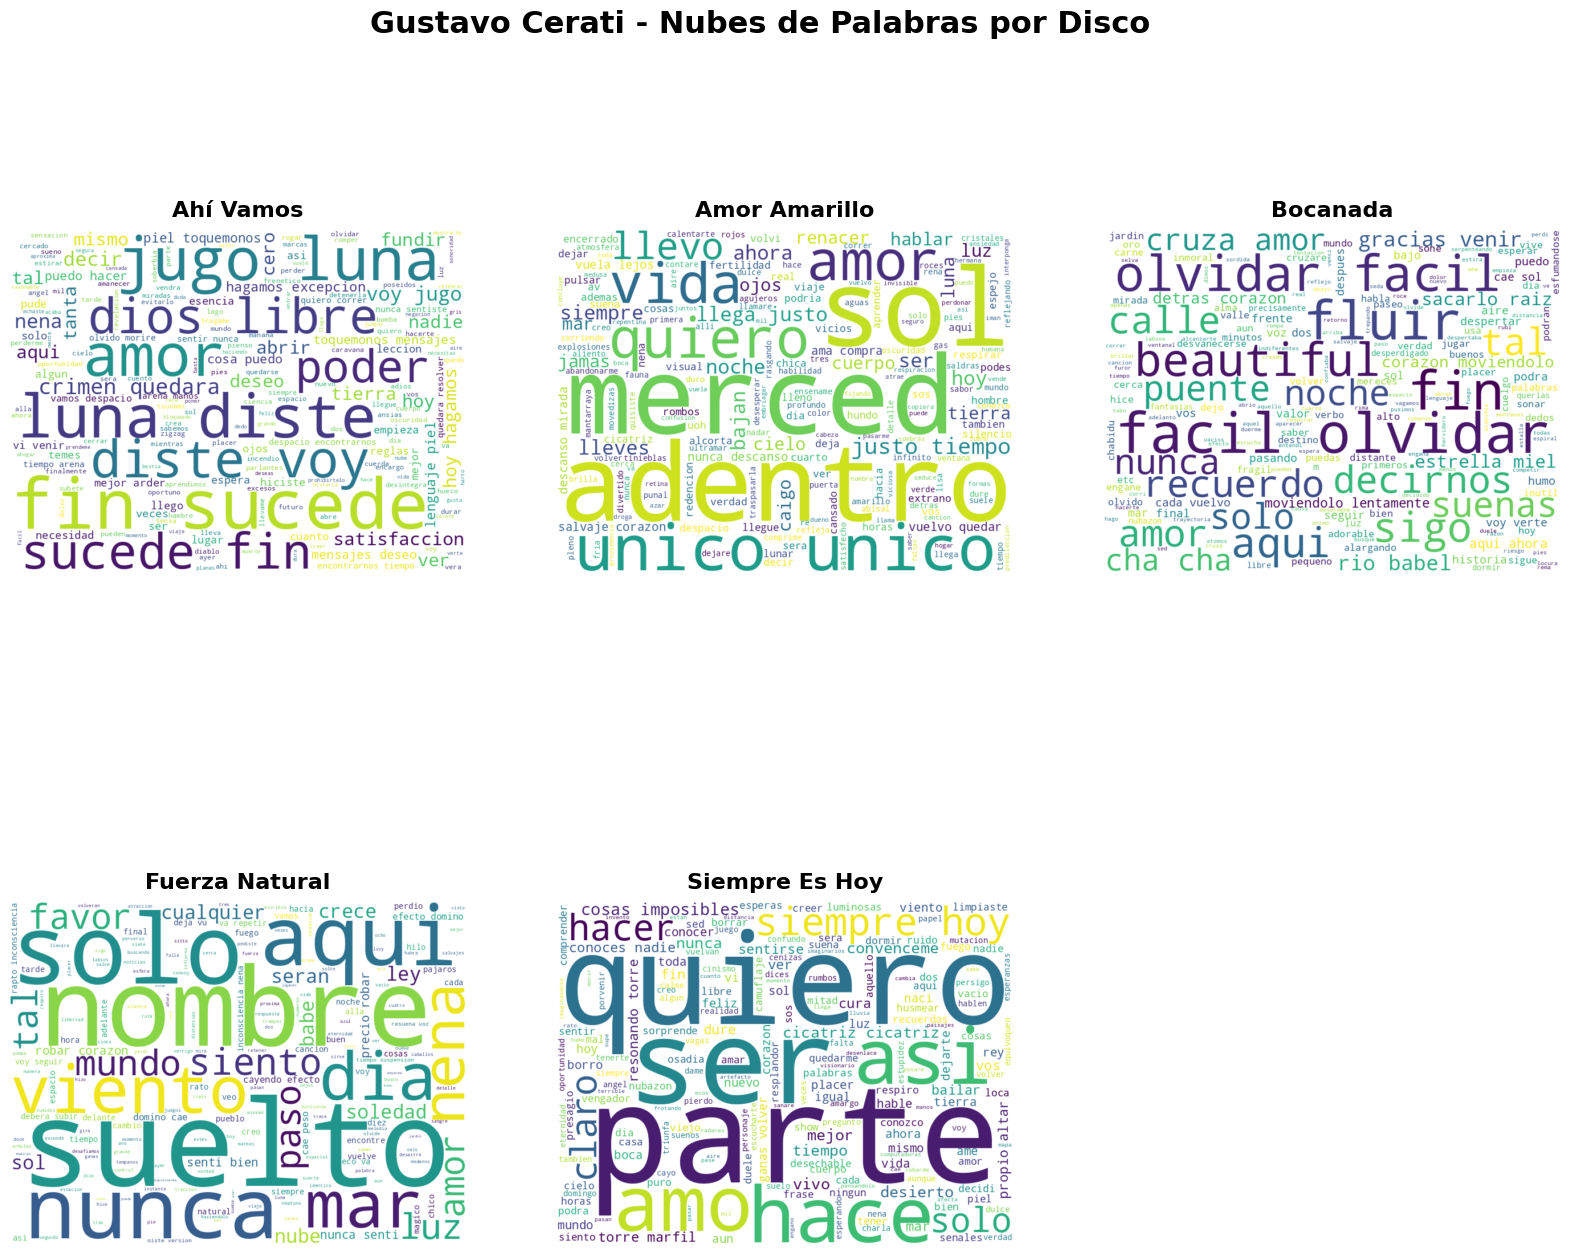

Nubes de palabras por disco generadas exitosamente


In [106]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Agrupar textos por disco
textos_por_disco = discos_dataset.groupby("disco")["texto_limpio"].apply(" ".join).reset_index()

# Crear figura
plt.figure(figsize=(20, 16))
plt.suptitle('Gustavo Cerati - Nubes de Palabras por Disco',
             fontsize=22, fontweight='bold', y=0.95)

# recorrer los discos (máximo 5 si querés limitar)
for i, row in enumerate(textos_por_disco.itertuples(), start=1):
    disco = row.disco
    texto = row.texto_limpio

    # generar nube de palabras
    nube_palabras = WordCloud(width=800, height=600, background_color="white",
                              colormap="viridis").generate(texto)

    # subplot en una grilla 2x3
    plt.subplot(2, 3, i)
    plt.imshow(nube_palabras, interpolation='bilinear')
    plt.axis('off')
    plt.title(disco, fontsize=16, fontweight='bold', pad=10)

plt.show()
print("Nubes de palabras por disco generadas exitosamente")


##Por Canciones seleccionadas

In [107]:
print(discos_dataset["cancion"].unique())

['Fuerza Natural' 'Deja Vu' 'Magia' 'Amor Sin Rodeos' 'Tracción A Sangre'
 'Desatre' 'Rapto' 'Cactus' 'Naturaleza Muerta' 'Dominó' 'Sal' 'Convoy'
 'He Visto A Lucy' 'Numeral' 'Al Fin Sucede' 'La Excepción'
 'Uno Entre Mil' 'Caravana' 'Adios' 'Me Quedo Aquí' 'Lago En El Cielo'
 'Dios Nos Libre' 'Otra Piel' 'Medium' 'Bomba De Tiempo' 'Crímen'
 'Jugo De Luna' 'Cosas Imposibles' 'No Te Creo' 'Artefacto'
 'Naci Para Esto' 'Amo Dejarte Asi' 'Tu Cicatriz En Mi'
 'Señales Luminosas' 'Karaoke' 'Sulky' 'Casa' 'Camuflaje' 'Altar'
 'Torre De Marfil' 'Fantasma' 'Vivo' 'Sudestada' 'Especie' 'Tabú' 'Engaña'
 'Bocanada' 'Puente' 'Río Babel' 'Beautifoul' 'Perdonar Es Divino'
 'Verbo Carne' 'Raíz' 'Y Si El Humo Está En Foco' 'Paseo Inmoral'
 'Aquí Y Ahora' 'Aquí Y Ahora (Y Después)' 'Alma' 'Balsa' 'Amor Amarillo'
 'Lisa' 'Te Llevo Para Que Me Lleves' 'Pulsar' 'Cabeza De Medusa'
 'Av Alcorta' 'Bajan' 'Rombos' 'Ahora Es Nunca' 'A Merced' 'Torteval']


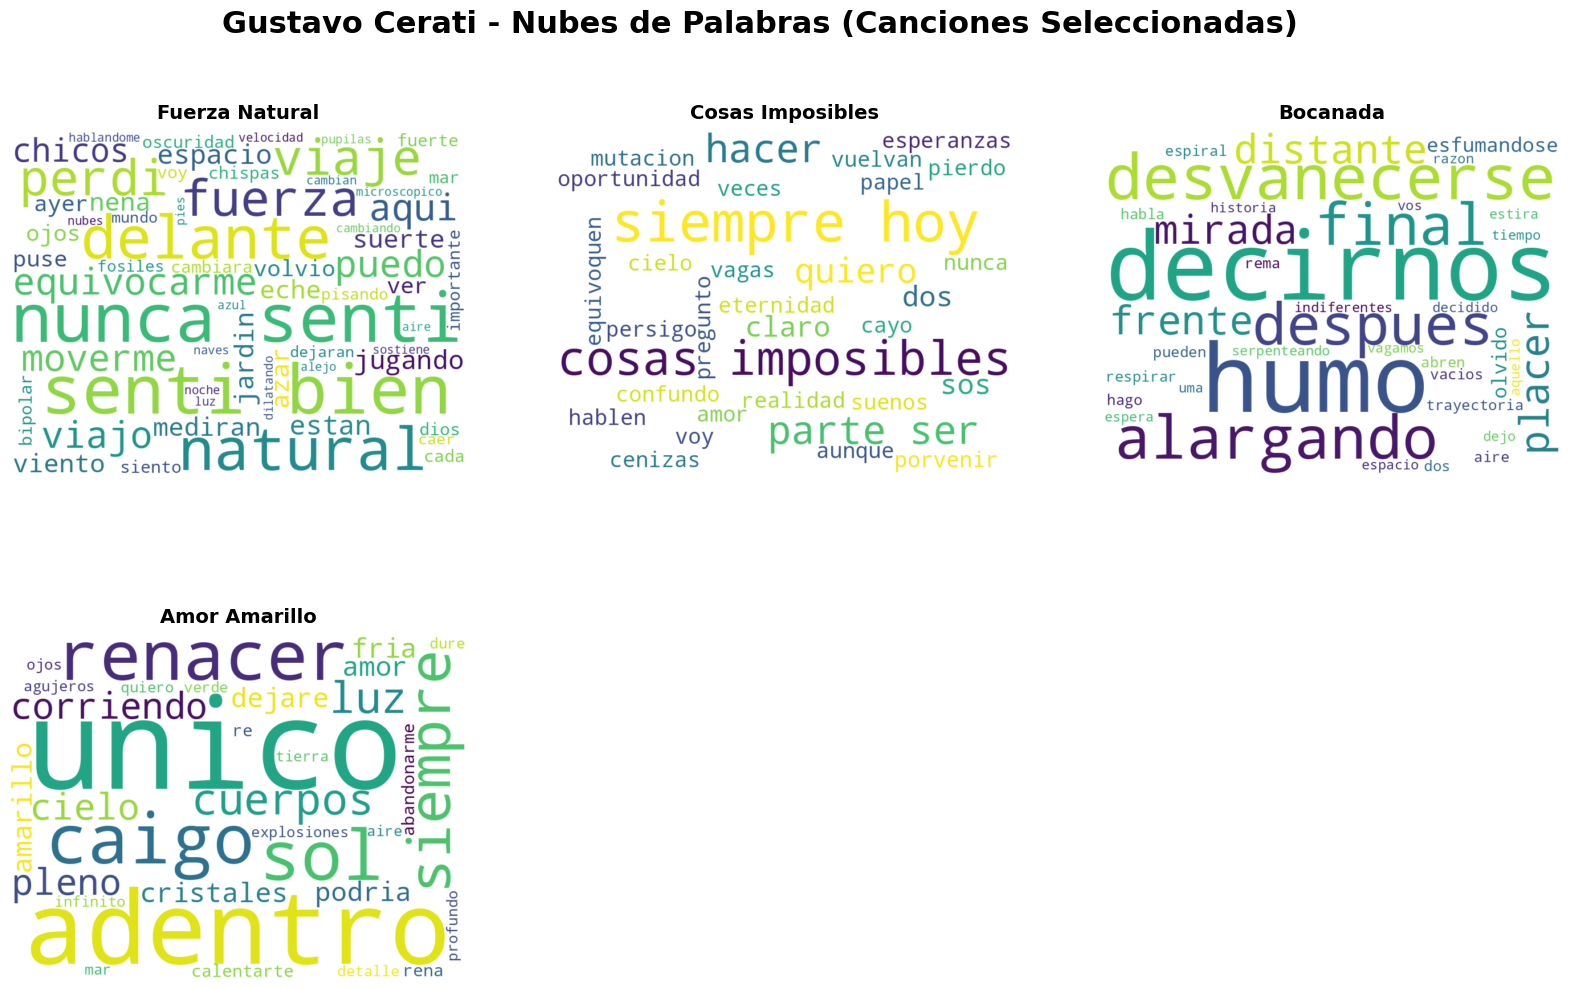

In [108]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

canciones_seleccionadas = [
    "Fuerza Natural",
    "Me quedo aqui",
    "Cosas imposibles",
    "Bocanada",
    "Amor amarillo"
]

# Filtro insensible a mayúsculas
subset = discos_dataset[
    discos_dataset["cancion"].str.lower().isin([c.lower() for c in canciones_seleccionadas])
]

num_canciones = len(subset)
cols = 3
rows = (num_canciones // cols) + (num_canciones % cols > 0)

plt.figure(figsize=(20, 6*rows))
plt.suptitle('Gustavo Cerati - Nubes de Palabras (Canciones Seleccionadas)',
             fontsize=22, fontweight='bold', y=0.95)

for i, row in enumerate(subset.itertuples(), start=1):
    titulo = row.cancion
    texto = row.texto_limpio

    nube_palabras = WordCloud(width=800, height=600, background_color="white",
                              colormap="viridis").generate(texto)

    plt.subplot(rows, cols, i)
    plt.imshow(nube_palabras, interpolation='bilinear')
    plt.axis('off')
    plt.title(titulo, fontsize=14, fontweight='bold', pad=10)

plt.show()


#Analisis Estadistico

##Canciones por Disco

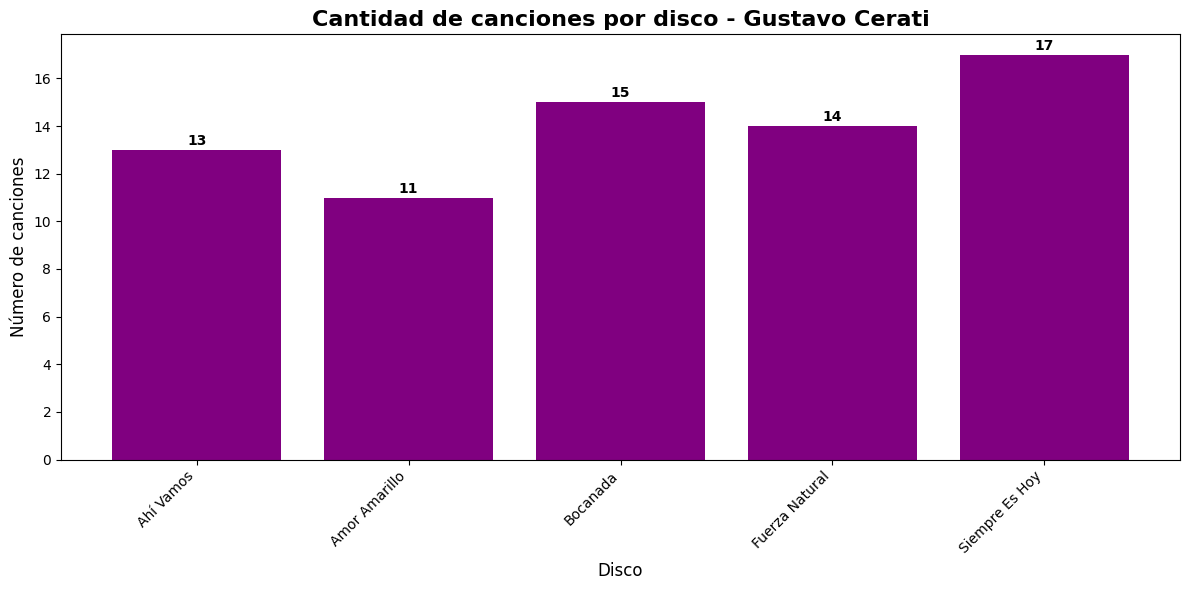

In [109]:


# Agrupar por disco y contar canciones
canciones_por_disco = discos_dataset.groupby("disco")["cancion"].count().reset_index()

# Renombrar columnas
canciones_por_disco.columns = ["Disco", "Cantidad de Canciones"]

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(canciones_por_disco["Disco"], canciones_por_disco["Cantidad de Canciones"], color="purple")

# Títulos y etiquetas
plt.title("Cantidad de canciones por disco - Gustavo Cerati", fontsize=16, fontweight="bold")
plt.xlabel("Disco", fontsize=12)
plt.ylabel("Número de canciones", fontsize=12)
plt.xticks(rotation=45, ha="right")

# Mostrar valores sobre las barras
for i, val in enumerate(canciones_por_disco["Cantidad de Canciones"]):
    plt.text(i, val + 0.2, str(val), ha="center", fontsize=10, fontweight="bold")

plt.tight_layout()
plt.show()


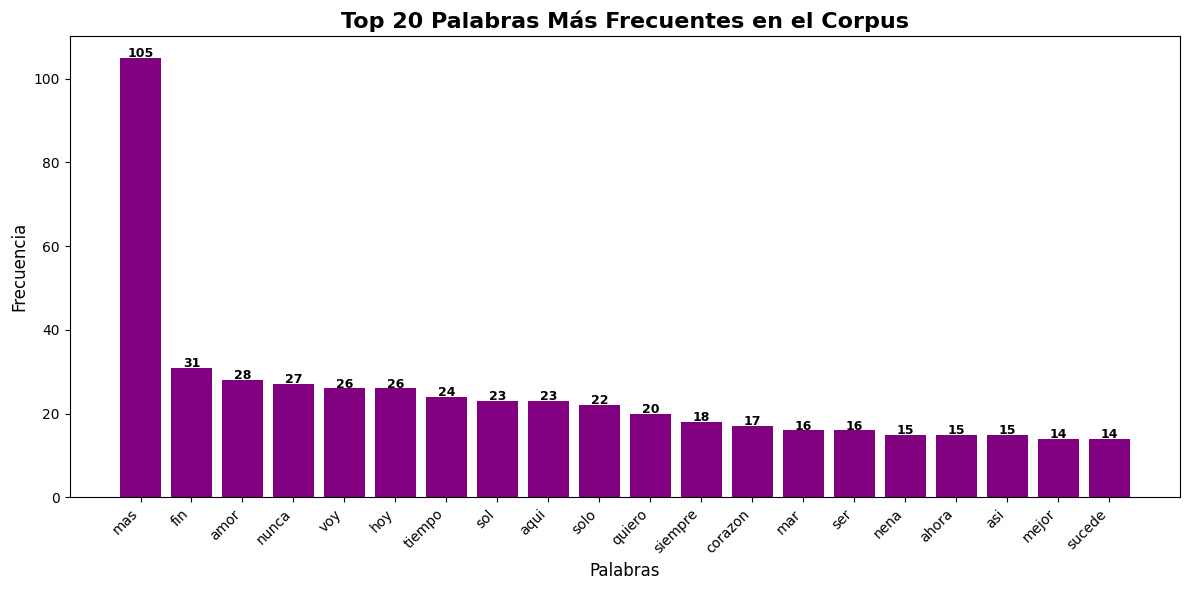

In [110]:
#Gráfico de barras con términos más frecuentes

# Tomamos el top 20 de palabras más frecuentes (que ya lo calculamos arriba)
top_20_bow = conteo_global.sort_values(ascending=False).head(20)

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top_20_bow.index, top_20_bow.values, color="purple")

# Títulos y etiquetas
plt.title("Top 20 Palabras Más Frecuentes en el Corpus", fontsize=16, fontweight="bold")
plt.xlabel("Palabras", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.xticks(rotation=45, ha="right")

# Mostrar valores sobre las barras
for i, val in enumerate(top_20_bow.values):
    plt.text(i, val + 0.2, str(val), ha="center", fontsize=9, fontweight="bold")

plt.tight_layout()
plt.show()


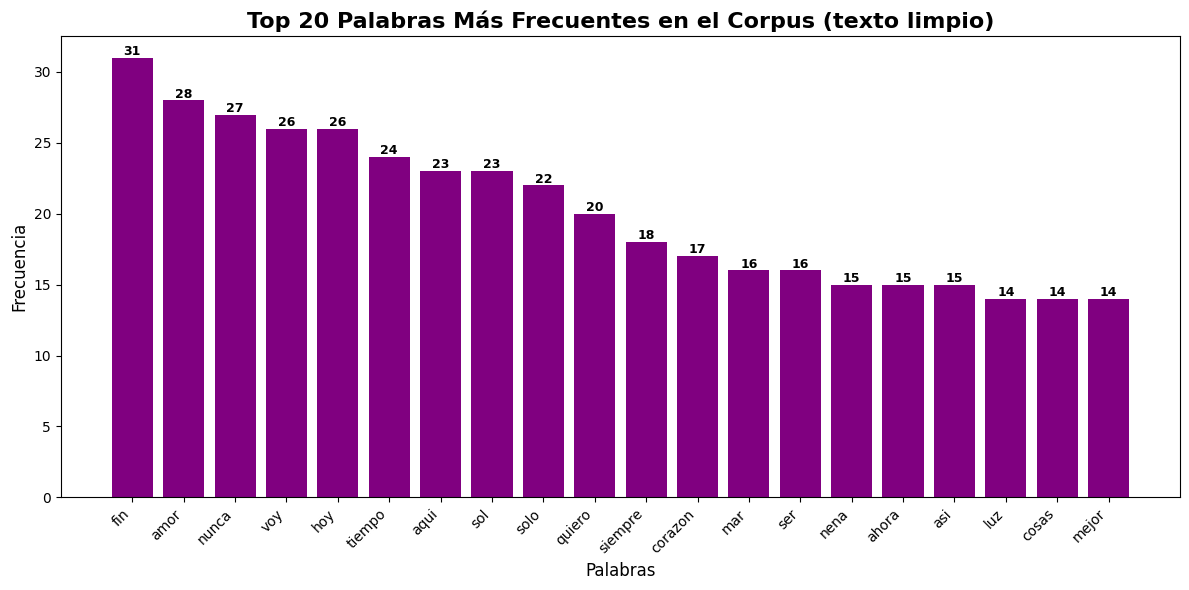

In [111]:
from collections import Counter
import matplotlib.pyplot as plt

# Unir todos los textos limpios en un solo string
texto_unido = " ".join(discos_dataset["texto_limpio"])

# Tokenizar (ya están limpios, así que solo split)
tokens = texto_unido.split()

# Contar frecuencias
conteo_limpio = Counter(tokens)

# Tomar el top 20
top_20_limpio = dict(conteo_limpio.most_common(20))

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top_20_limpio.keys(), top_20_limpio.values(), color="purple")

# Títulos y etiquetas
plt.title("Top 20 Palabras Más Frecuentes en el Corpus (texto limpio)", fontsize=16, fontweight="bold")
plt.xlabel("Palabras", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.xticks(rotation=45, ha="right")

# Mostrar valores sobre las barras
for i, val in enumerate(top_20_limpio.values()):
    plt.text(i, val + 0.2, str(val), ha="center", fontsize=9, fontweight="bold")

plt.tight_layout()
plt.show()


##Análisis Estadistico del Corpus de Gustavo Cerati

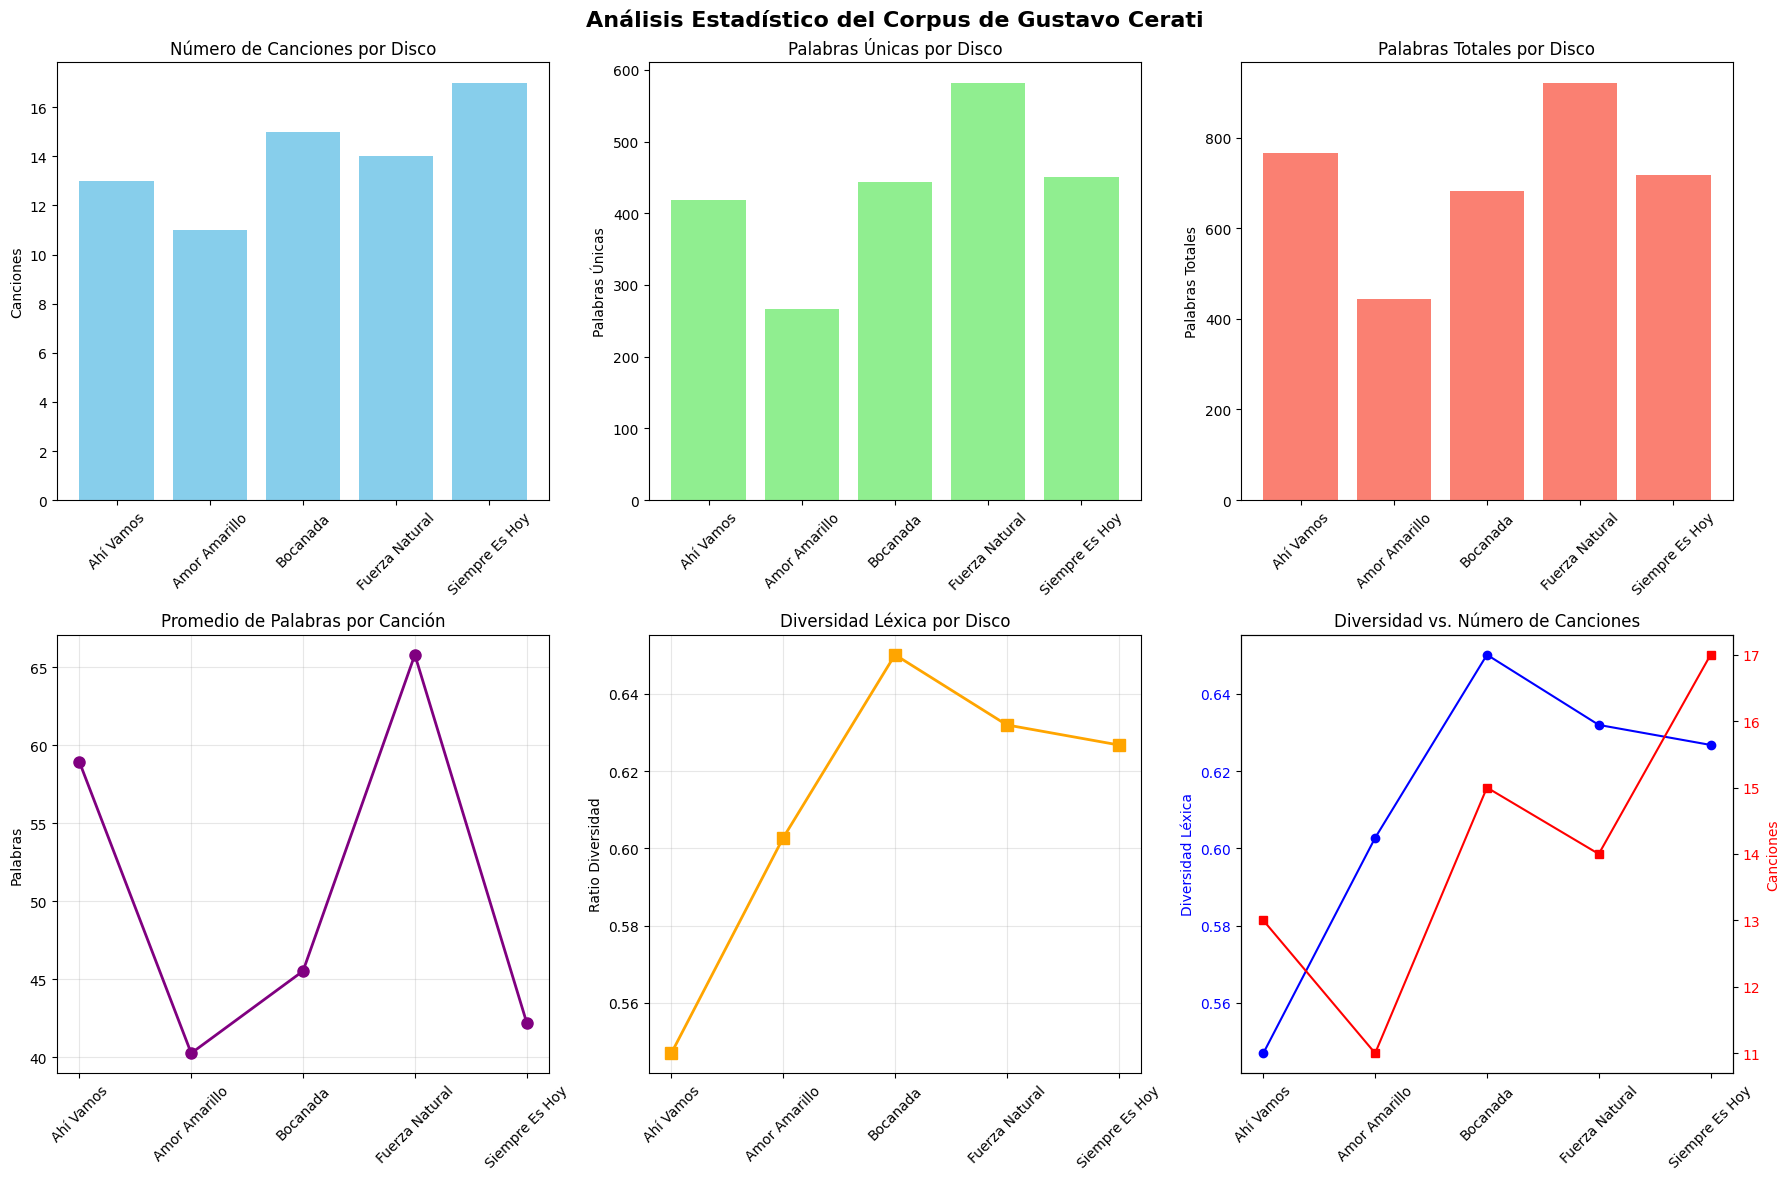

In [112]:


# Paso 1: armar estadísticas por disco
estadisticas_corpus = discos_dataset.groupby("disco").agg(
    Canciones=("cancion", "count"),
    Palabras_Totales=("texto_limpio", lambda x: sum(len(t.split()) for t in x)),
    Palabras_Unicas=("texto_limpio", lambda x: len(set(" ".join(x).split())))
).reset_index()

# Calcular métricas adicionales
estadisticas_corpus["Promedio_Palabras_Cancion"] = estadisticas_corpus["Palabras_Totales"] / estadisticas_corpus["Canciones"]
estadisticas_corpus["Diversidad_Lexica"] = estadisticas_corpus["Palabras_Unicas"] / estadisticas_corpus["Palabras_Totales"]

# Paso 2: graficar estilo "profesor"
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Análisis Estadístico del Corpus de Gustavo Cerati', fontsize=16, fontweight='bold')

# Gráfico 1: Canciones por disco
axes[0, 0].bar(estadisticas_corpus['disco'], estadisticas_corpus['Canciones'], color='skyblue')
axes[0, 0].set_title('Número de Canciones por Disco')
axes[0, 0].set_ylabel('Canciones')
axes[0, 0].tick_params(axis='x', rotation=45)

# Gráfico 2: Palabras únicas por disco
axes[0, 1].bar(estadisticas_corpus['disco'], estadisticas_corpus['Palabras_Unicas'], color='lightgreen')
axes[0, 1].set_title('Palabras Únicas por Disco')
axes[0, 1].set_ylabel('Palabras Únicas')
axes[0, 1].tick_params(axis='x', rotation=45)

# Gráfico 3: Palabras totales por disco
axes[0, 2].bar(estadisticas_corpus['disco'], estadisticas_corpus['Palabras_Totales'], color='salmon')
axes[0, 2].set_title('Palabras Totales por Disco')
axes[0, 2].set_ylabel('Palabras Totales')
axes[0, 2].tick_params(axis='x', rotation=45)

# Gráfico 4: Promedio de palabras por canción
axes[1, 0].plot(estadisticas_corpus['disco'], estadisticas_corpus['Promedio_Palabras_Cancion'],
                marker='o', linewidth=2, markersize=8, color='purple')
axes[1, 0].set_title('Promedio de Palabras por Canción')
axes[1, 0].set_ylabel('Palabras')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# Gráfico 5: Diversidad léxica
axes[1, 1].plot(estadisticas_corpus['disco'], estadisticas_corpus['Diversidad_Lexica'],
                marker='s', linewidth=2, markersize=8, color='orange')
axes[1, 1].set_title('Diversidad Léxica por Disco')
axes[1, 1].set_ylabel('Ratio Diversidad')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

# Gráfico 6: Comparativo diversidad vs canciones
ax2 = axes[1, 2].twinx()
line1 = axes[1, 2].plot(estadisticas_corpus['disco'], estadisticas_corpus['Diversidad_Lexica'],
                        'b-o', label='Diversidad Léxica')
line2 = ax2.plot(estadisticas_corpus['disco'], estadisticas_corpus['Canciones'],
                 'r-s', label='Canciones')
axes[1, 2].set_title('Diversidad vs. Número de Canciones')
axes[1, 2].set_ylabel('Diversidad Léxica', color='b')
ax2.set_ylabel('Canciones', color='r')
axes[1, 2].tick_params(axis='x', rotation=45)
axes[1, 2].tick_params(axis='y', labelcolor='b')
ax2.tick_params(axis='y', labelcolor='r')

plt.tight_layout()
plt.show()


## Evolucion Temporal de palabras claves

In [113]:
# palabras_existentes: las palabras  en data_bow
palabras_existentes = ['fuerza', 'cielo', 'amor', 'luz', 'sangre', 'corazon']

if palabras_existentes:  # si hay alguna palabra disponible
    evolucion_temporal = pd.DataFrame(index=discos_dataset['disco'].unique())
    for palabra in palabras_existentes:
        # sumar la frecuencia de la palabra por disco
        conteo = data_bow.groupby(discos_dataset['disco'])[palabra].sum()
        evolucion_temporal[palabra] = conteo

    print("Evolución temporal de palabras clave:")
    print(evolucion_temporal)
else:
    print("No se encontraron palabras disponibles para el análisis temporal.")


Evolución temporal de palabras clave:
                fuerza  cielo  amor  luz  sangre  corazon
Fuerza Natural       2      2     4    4       2        5
Ahí Vamos            0      2     8    2       0        1
Siempre Es Hoy       0      2     2    3       0        3
Bocanada             0      1     8    2       0        5
Amor Amarillo        0      3     6    3       0        3


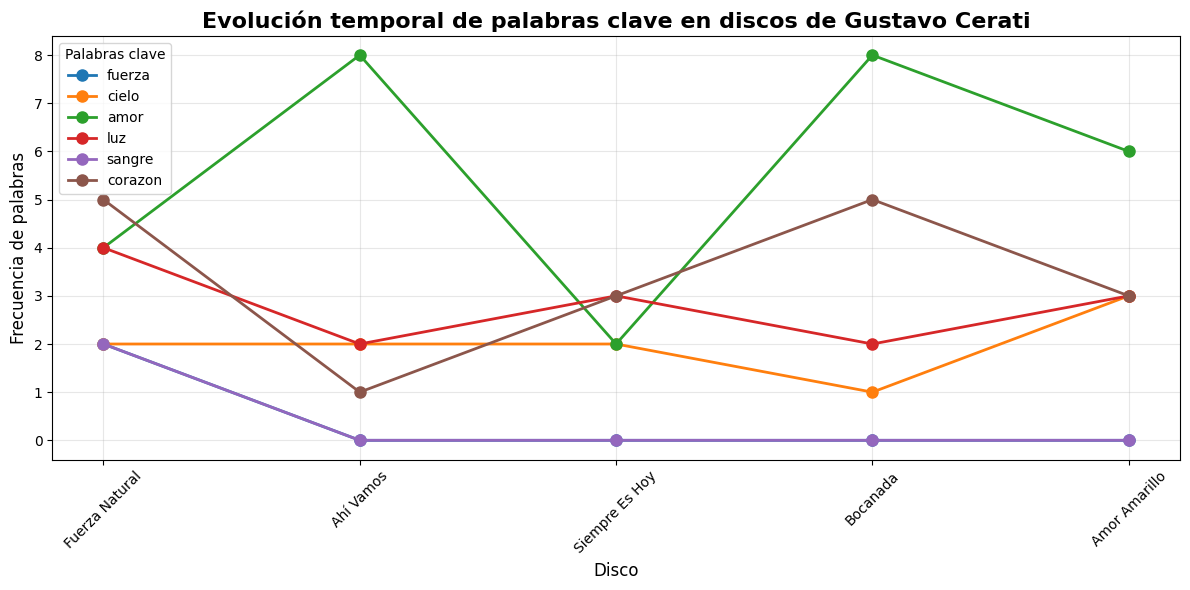

In [114]:


# Graficar evolución temporal de palabras clave
plt.figure(figsize=(12, 6))
for palabra in evolucion_temporal.columns:
    plt.plot(evolucion_temporal.index, evolucion_temporal[palabra],
             marker='o', linewidth=2, markersize=8, label=palabra)

# Personalizar el gráfico
plt.title("Evolución temporal de palabras clave en discos de Gustavo Cerati", fontsize=16, fontweight='bold')
plt.xlabel("Disco", fontsize=12)
plt.ylabel("Frecuencia de palabras", fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend(title="Palabras clave")
plt.tight_layout()
plt.show()


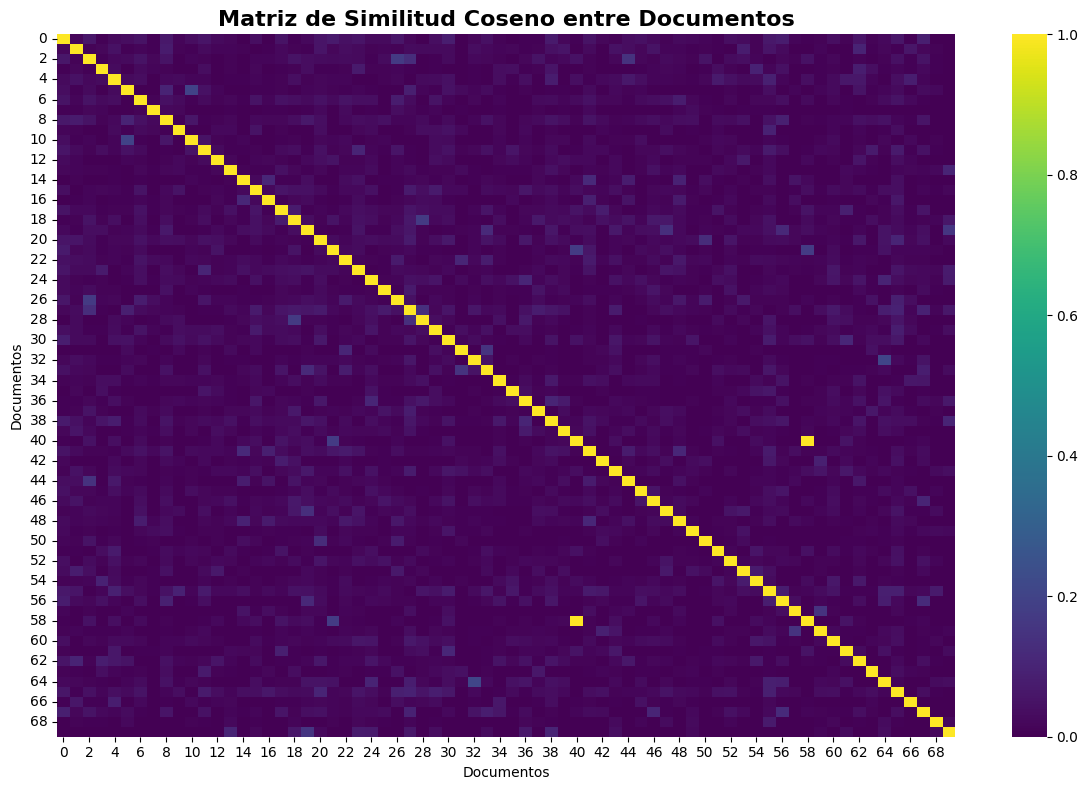

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap de similitud coseno
plt.figure(figsize=(12, 8))
sns.heatmap(sim_matrix, cmap="viridis", annot=False)

plt.title("Matriz de Similitud Coseno entre Documentos", fontsize=16, fontweight="bold")
plt.xlabel("Documentos")
plt.ylabel("Documentos")
plt.tight_layout()
plt.show()


In [116]:
def graficar_palabras(b):
    seleccion = list(seleccion_palabras.value)

    # Filtrar solo las palabras disponibles
    seleccion_validas = [p for p in seleccion if p in evolucion_temporal.columns]

    if not seleccion_validas:
        print("Ninguna de las palabras seleccionadas está disponible en el vocabulario.")
        return

    plt.figure(figsize=(12,6))
    for palabra in seleccion_validas:
        plt.plot(evolucion_temporal.index, evolucion_temporal[palabra],
                 marker='o', linewidth=2, markersize=8, label=palabra)

    plt.title("Evolución temporal de palabras seleccionadas", fontsize=16, fontweight='bold')
    plt.xlabel("Disco")
    plt.ylabel("Frecuencia de palabras")
    plt.xticks(rotation=45)
    plt.grid(alpha=0.3)
    plt.legend(title="Palabras")
    plt.tight_layout()
    plt.show()


#Interfaz para seleccionar las palabras v1

En esta parte lo que se ofrece es una interfaz con menú desplegable con las palabras a elegir, luego el programa ofrece el gráfico de evolución temporal

Palabras más frecuentes: ['fin', 'amor', 'nunca', 'voy', 'hoy', 'tiempo', 'aqui', 'sol', 'solo', 'quiero', 'siempre', 'corazon', 'mar', 'ser', 'nena']


SelectMultiple(description='Palabras:', index=(1, 2), options=('amor', 'fuerza', 'cielo', 'sueño', 'luz', 'san…

Button(button_style='success', description='Generar gráfico', style=ButtonStyle())

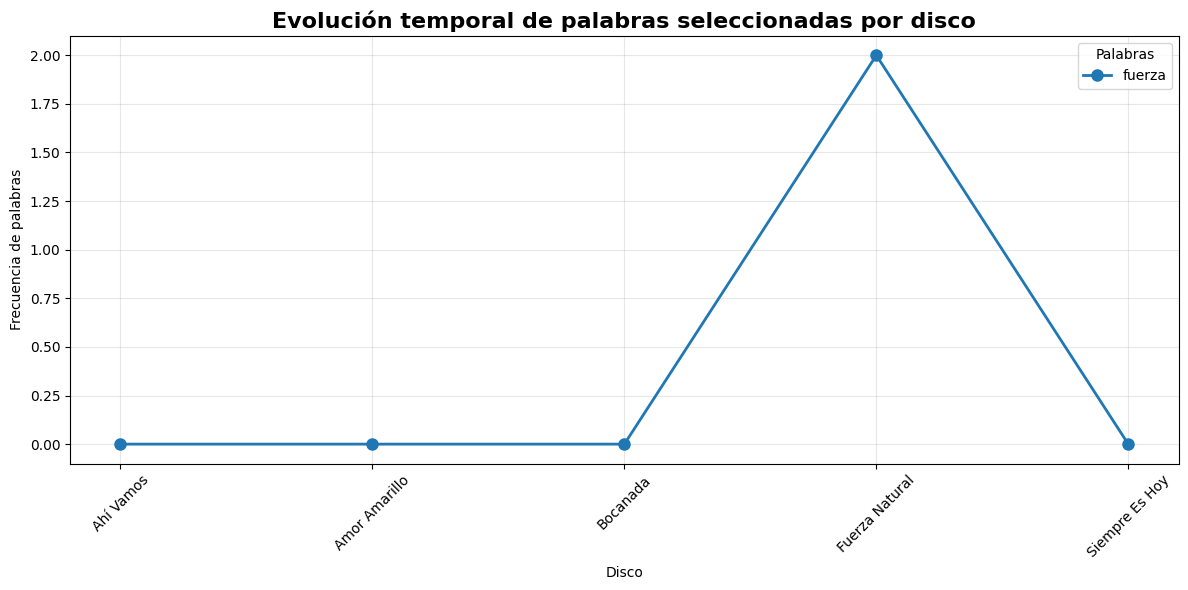

In [117]:
import matplotlib.pyplot as plt
from collections import Counter
import ipywidgets as widgets
from IPython.display import display
from collections import Counter

# Unir todo el texto limpio
texto_total = " ".join(discos_dataset['texto_limpio'])

# Contar frecuencia de cada palabra
conteo = Counter(texto_total.split())

# Tomar las N palabras más frecuentes
palabras_interes = [palabra for palabra, freq in conteo.most_common(15)]
print("Palabras más frecuentes:", palabras_interes)


# Lista de palabras sugeridas (puede ser cualquier lista)
palabras_interes = ['amor','fuerza', 'cielo', 'sueño', 'luz', 'sangre', 'corazon']

# Widget de selección múltiple
seleccion_palabras = widgets.SelectMultiple(
    options=palabras_interes,
    value=['fuerza', 'cielo'],  # valores por defecto
    description='Palabras:',
    disabled=False
)

boton_graficar = widgets.Button(description="Generar gráfico", button_style='success')

def graficar_palabras(b):
    seleccion = list(seleccion_palabras.value)
    if not seleccion:
        print("Por favor, seleccioná al menos una palabra.")
        return

    # Construir DataFrame de evolución temporal dinámicamente desde texto_limpio
    evolucion_temporal = {}
    for disco, grupo in discos_dataset.groupby('disco'):
        # Contar palabras de todas las canciones del disco
        palabras = " ".join(grupo['texto_limpio']).split()
        conteo = Counter(palabras)
        evolucion_temporal[disco] = {p: conteo.get(p, 0) for p in seleccion}

    # Convertir a DataFrame
    df_evol = pd.DataFrame.from_dict(evolucion_temporal, orient='index')

    # Graficar
    plt.figure(figsize=(12,6))
    for palabra in df_evol.columns:
        plt.plot(df_evol.index, df_evol[palabra],
                 marker='o', linewidth=2, markersize=8, label=palabra)

    plt.title("Evolución temporal de palabras seleccionadas por disco", fontsize=16, fontweight='bold')
    plt.xlabel("Disco")
    plt.ylabel("Frecuencia de palabras")
    plt.xticks(rotation=45)
    plt.grid(alpha=0.3)
    plt.legend(title="Palabras")
    plt.tight_layout()
    plt.show()

# Conectar botón con la función
boton_graficar.on_click(graficar_palabras)

# Mostrar widgets
display(seleccion_palabras, boton_graficar)


#Interfaz para seleccionar las palabras v2

En esta parte lo que se ofrece es una interfaz con ingreso por el usuario de la palabra a elegir, luego el programa ofrece tambien el gráfico de evolución temporal

Escriba la palabra que quiere analizar: fuerza


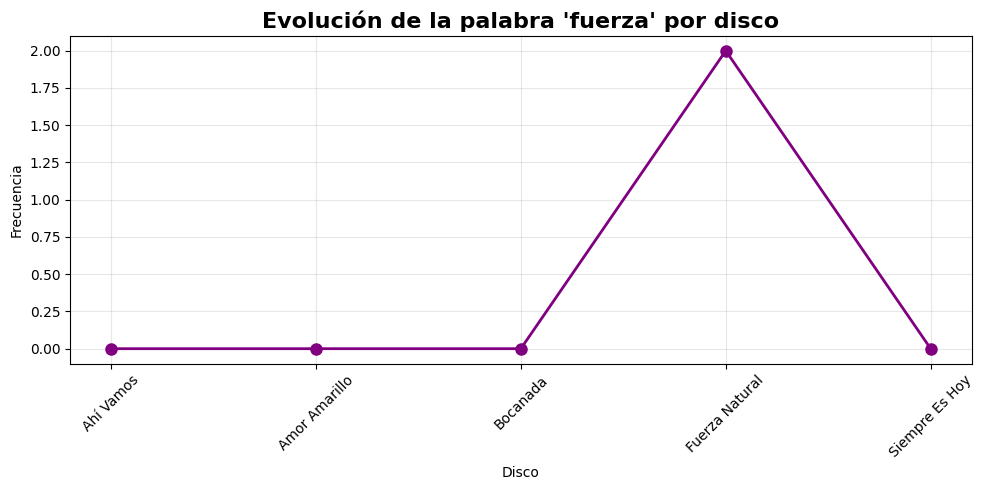

In [118]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# Función para graficar evolución de una palabra escrita por el usuario
def graficar_palabra_usuario():
    # Pedir palabra al usuario
    palabra = input("Escriba la palabra que quiere analizar: ").strip().lower()

    # Construir DataFrame de evolución temporal desde texto_limpio
    evolucion_temporal = {}
    for disco, grupo in discos_dataset.groupby('disco'):
        palabras = " ".join(grupo['texto_limpio']).split()
        conteo = Counter(palabras)
        evolucion_temporal[disco] = {palabra: conteo.get(palabra, 0)}

    df_evol = pd.DataFrame.from_dict(evolucion_temporal, orient='index')

    # Verificar si la palabra existe en algún disco
    if df_evol[palabra].sum() == 0:
        print(f"La palabra '{palabra}' no se encuentra en ningún disco del corpus.")
        return

    # Graficar
    plt.figure(figsize=(10,5))
    plt.plot(df_evol.index, df_evol[palabra], marker='o', linewidth=2, markersize=8, color='purple')
    plt.title(f"Evolución de la palabra '{palabra}' por disco", fontsize=16, fontweight='bold')
    plt.xlabel("Disco")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Ejecutar la función
graficar_palabra_usuario()


#Interfaz para seleccionar las palabras v3

In [119]:
import gradio as gr
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# Unir todo el texto limpio para sugerir palabras
texto_total = " ".join(discos_dataset['texto_limpio'])
conteo_total = Counter(texto_total.split())
palabras_sugeridas = [palabra for palabra, freq in conteo_total.most_common(20)]  # top 20

# Función para graficar
def graficar_palabras_gradio(palabras_input):
    # Convertir input a lista de palabras
    palabras = [p.strip() for p in palabras_input.split(",") if p.strip()]

    if not palabras:
        return "Por favor, ingresá al menos una palabra separada por comas."


    # Construir DataFrame de evolución temporal
    evolucion_temporal = {}
    for disco, grupo in discos_dataset.groupby('disco'):
        palabras_disco = " ".join(grupo['texto_limpio']).split()
        conteo_disco = Counter(palabras_disco)
        evolucion_temporal[disco] = {p: conteo_disco.get(p, 0) for p in palabras}

    df_evol = pd.DataFrame.from_dict(evolucion_temporal, orient='index')

    # Crear gráfico
    fig, ax = plt.subplots(figsize=(12,6))
    for palabra in df_evol.columns:
        ax.plot(df_evol.index, df_evol[palabra], marker='o', linewidth=2, markersize=8, label=palabra)

    ax.set_title("Evolución temporal de palabras seleccionadas por disco", fontsize=16, fontweight='bold')
    ax.set_xlabel("Disco")
    ax.set_ylabel("Frecuencia de palabras")
    ax.tick_params(axis='x', rotation=45)
    ax.grid(alpha=0.3)
    ax.legend(title="Palabras")

    plt.tight_layout()
    return fig

# Crear interfaz Gradio
iface = gr.Interface(
    fn=graficar_palabras_gradio,
    inputs=gr.Textbox(label="Ingresá palabras separadas por comas", placeholder="fuerza, cielo, sueño"),
    outputs="plot",
    examples=[["fuerza, cielo"], ["luz, amor, corazón"]]
)

iface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://24c71bb13991554cc9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


#Sección 4: Análisis con Word Embeddings

In [120]:

!python -m spacy download es_core_news_md
import spacy
import numpy as np

# Cargar modelo de spaCy con vectores

nlp = spacy.load("es_core_news_md")

# Procesar corpus y obtener vectores documento = promedio de vectores de las palabras
doc_vectors = []
for texto in discos_dataset["texto_limpio"]:
    doc = nlp(texto)
    if len(doc) > 0:
        doc_vector = doc.vector  # spaCy nos da el embedding promedio del documento
    else:
        doc_vector = np.zeros(nlp.vocab.vectors_length)
    doc_vectors.append(doc_vector)

doc_vectors = np.array(doc_vectors)
print("Embeddings generados para todos los documentos:", doc_vectors.shape)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 13.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Embeddings generados para todos los documentos: (70, 300)


Un embedding es una representación densa de las palabras en un espacio vectorial, donde palabras con significados similares quedan cercanas entre sí.

A diferencia de BoW o TF-IDF (que solo cuentan ocurrencias), los embeddings capturan relaciones semánticas.

Ejemplo: "amor" y "querer" estarán cerca en embeddings, aunque aparezcan en distintos contextos.

In [121]:
from sklearn.metrics.pairwise import cosine_similarity

# Matriz de similitud con embeddings
sim_matrix_emb = cosine_similarity(doc_vectors)

# Comparar con TF-IDF
sim_matrix_tfidf = cosine_similarity(X_tfidf)

# Encontrar pares más similares con embeddings
pares = []
n_docs = len(discos_dataset)
for i in range(n_docs):
    for j in range(i+1, n_docs):
        pares.append(((i, j), sim_matrix_emb[i, j]))

pares_ordenados = sorted(pares, key=lambda x: x[1], reverse=True)

print("=== PARES MÁS SIMILARES (Embeddings) ===")
for (i, j), score in pares_ordenados[:3]:
    print(f"{discos_dataset.iloc[i]['cancion']} <-> {discos_dataset.iloc[j]['cancion']} | Similitud = {score:.4f}")


=== PARES MÁS SIMILARES (Embeddings) ===
Fantasma <-> Balsa | Similitud = 1.0000
Fuerza Natural <-> Altar | Similitud = 0.9081
Deja Vu <-> Bocanada | Similitud = 0.9080


Interpretación esperada:

Con TF-IDF, la similitud depende de palabras compartidas exactas.

Con embeddings, puede aparecer similitud entre canciones que usan palabras distintas pero con significados cercanos.

In [122]:


# Función para encontrar palabras más similares en el vocabulario de spaCy
def palabras_similares(palabra, topn=5):
    token = nlp(palabra)
    sims = []
    for w in nlp.vocab:
        if w.has_vector and w.is_alpha and w.lower_ != palabra:
            sims.append((w.lower_, token.similarity(w)))
    sims = sorted(sims, key=lambda x: x[1], reverse=True)
    return sims[:topn]

# Mostrar resultados en tablas
def mostrar_tabla(palabra, topn=5):
    similares = palabras_similares(palabra, topn)
    df = pd.DataFrame(similares, columns=["Palabra", "Similitud"])
    print(f"\nPalabras más similares a '{palabra}':")
    display(df)

mostrar_tabla("amor", 5)
mostrar_tabla("vida", 5)

# Analogía estilo word2vec: pasion - calor + fuerza ≈ ?
pasion = nlp("pasion").vector
calor = nlp("calor").vector
fuerza = nlp("fuerza").vector

analogia = pasion - calor + fuerza
sims = []
for w in nlp.vocab:
    if w.has_vector and w.is_alpha:
        sims.append((w.lower_, cosine_similarity([analogia],[w.vector])[0][0]))
sims = sorted(sims, key=lambda x: x[1], reverse=True)[:10]

# Mostrar analogía en tabla
df_analogia = pd.DataFrame(sims, columns=["Palabra", "Similitud"])
print("\nAnalogía: 'pasion es a calor como fuerza es a ...'")
display(df_analogia)



Palabras más similares a 'amor':


,Palabra,Similitud
0,ternura,0.619840
1,amarte,0.590508
2,amar,0.590508
3,deseo,0.583079
4,pasion,0.578857



Palabras más similares a 'vida':


,Palabra,Similitud
0,eternidad,0.640209
1,historia,0.577142
2,inconsciencia,0.573739
3,soledad,0.566574
4,naturaleza,0.552190



Analogía: 'pasion es a calor como fuerza es a ...'


,Palabra,Similitud
0,fuerza,0.556628
1,pasion,0.489208
2,corazon,0.489208
3,razon,0.405864
4,intuicion,0.405864
5,libertad,0.401839
6,inmoral,0.400420
7,fe,0.397477
8,lucha,0.396614
9,actitud,0.391535


In [123]:


# Pares más similares con TF-IDF
pares_tfidf = []
for i in range(n_docs):
    for j in range(i+1, n_docs):
        pares_tfidf.append(((i, j), sim_matrix_tfidf[i, j]))
pares_tfidf = sorted(pares_tfidf, key=lambda x: x[1], reverse=True)[:3]

# Pares más similares con Embeddings
pares_emb = pares_ordenados[:3]

tabla_comp = pd.DataFrame({
    "Método": ["TF-IDF"]*3 + ["Embeddings"]*3,
    "Documento 1": [discos_dataset.iloc[i]["cancion"] for (i,j),_ in pares_tfidf] + [discos_dataset.iloc[i]["cancion"] for (i,j),_ in pares_emb],
    "Documento 2": [discos_dataset.iloc[j]["cancion"] for (i,j),_ in pares_tfidf] + [discos_dataset.iloc[j]["cancion"] for (i,j),_ in pares_emb],
    "Similitud": [score for _,score in pares_tfidf] + [score for _,score in pares_emb]
})

print(tabla_comp)


       Método        Documento 1 Documento 2  Similitud
0      TF-IDF           Fantasma       Balsa   1.000000
1      TF-IDF  Tu Cicatriz En Mi  Av Alcorta   0.204711
2      TF-IDF            Desatre         Sal   0.198966
3  Embeddings           Fantasma       Balsa   1.000000
4  Embeddings     Fuerza Natural       Altar   0.908145
5  Embeddings            Deja Vu    Bocanada   0.907994


Muchas veces, embeddings dan resultados más intuitivos (ej. dos canciones sobre "amor" aunque usen palabras distintas).

TF-IDF puede ser suficiente si nos interesa similitud léxica exacta.

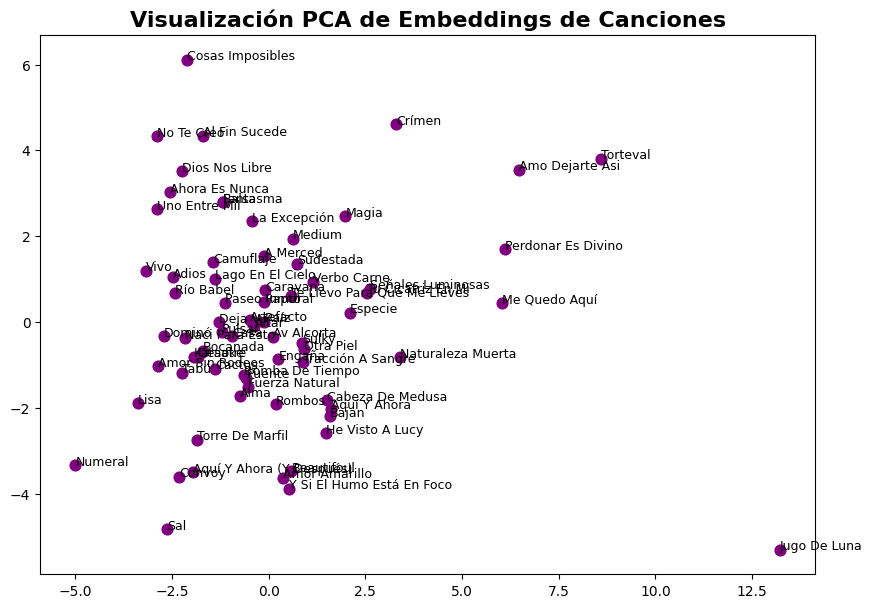

In [124]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducir a 2D
pca = PCA(n_components=2)
coords = pca.fit_transform(doc_vectors)

plt.figure(figsize=(10, 7))
plt.scatter(coords[:,0], coords[:,1], c="purple", s=60)

for i, txt in enumerate(discos_dataset["cancion"]):
    plt.annotate(txt, (coords[i,0], coords[i,1]), fontsize=9)

plt.title("Visualización PCA de Embeddings de Canciones", fontsize=16, fontweight="bold")
plt.show()


In [125]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from ipywidgets import interact

# Reducir a 3D
pca = PCA(n_components=3)
coords = pca.fit_transform(doc_vectors)

# Función para graficar con un ángulo variable
def plot_3d(angle=30):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection="3d")

    ax.scatter(coords[:,0], coords[:,1], coords[:,2], c="purple", s=60)

    for i, txt in enumerate(discos_dataset["cancion"]):
        ax.text(coords[i,0], coords[i,1], coords[i,2], txt, fontsize=8)

    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")
    ax.set_zlabel("PCA 3")
    ax.view_init(30, angle)  # 30° en elevación, 'angle' en azimut

    plt.title("Visualización 3D PCA con Control de Rotación", fontsize=16, fontweight="bold")
    plt.show()

# Slider para mover la vista (0° a 360°)
interact(plot_3d, angle=widgets.IntSlider(min=0, max=360, step=5, value=30))



interactive(children=(IntSlider(value=30, description='angle', max=360, step=5), Output()), _dom_classes=('wid…

<function __main__.plot_3d(angle=30)>

In [147]:
import plotly.express as px
from sklearn.decomposition import PCA

# Reducir a 3D
pca = PCA(n_components=3)
coords = pca.fit_transform(doc_vectors)

# Agregar a un DataFrame para plotly
import pandas as pd
df_plot = pd.DataFrame(coords, columns=["PCA1", "PCA2", "PCA3"])
df_plot["cancion"] = discos_dataset["cancion"]

# Gráfico interactivo
fig = px.scatter_3d(
    df_plot,
    x="PCA1", y="PCA2", z="PCA3",
    text="cancion",  # aparece con hover
    color="cancion", # o podrías usar color por disco si tenés esa variable
    size_max=8,
    opacity=0.7
)

fig.update_traces(marker=dict(size=6))
fig.update_layout(title="Visualización Interactiva PCA 3D de Canciones")
fig.show()


In [149]:
# Guardar la gráfica interactiva directamente en tu Google Drive

output_path = "/content/drive/MyDrive/2025/06 - Barreto - Procesamiento del Lenguaje Natural/Git/Trabajo Integrador/grafica_3d_embedding.html"

# Exportar el gráfico como HTML interactivo
fig.write_html(output_path)

print(f"Archivo guardado en: {output_path}")

Archivo guardado en: /content/drive/MyDrive/2025/06 - Barreto - Procesamiento del Lenguaje Natural/Git/Trabajo Integrador/grafica_3d_embedding.html


#Sección 5: Análisis Complementario

##Análisis de Sentimientos

In [140]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

# Analizar cada canción
sentimientos = []
for i, texto in enumerate(discos_dataset["texto_limpio"]):
    blob = TextBlob(texto)
    polarity = blob.sentiment.polarity   # entre -1 (negativo) y 1 (positivo)
    subjectivity = blob.sentiment.subjectivity
    sentimientos.append((i, polarity, subjectivity))

# Guardar en dataframe
df_sentimientos = pd.DataFrame(sentimientos, columns=["Index","Polaridad","Subjetividad"])
df_sentimientos = pd.concat([discos_dataset[["cancion","autor","año"]].reset_index(drop=True),
                             df_sentimientos], axis=1)

display(df_sentimientos.head())


,cancion,autor,año,Index,Polaridad,Subjetividad
0,Fuerza Natural,Gustavo Cerati,2009,0,0.1,0.4
1,Deja Vu,Gustavo Cerati,2009,1,0.0,1.0
2,Magia,Gustavo Cerati,2009,2,0.0,0.0
3,Amor Sin Rodeos,Gustavo Cerati,2009,3,0.0,0.0
4,Tracción A Sangre,Gustavo Cerati,2009,4,0.0,0.0


In [141]:
# Ordenar por polaridad (si usás TextBlob)
print("=== Canciones más positivas ===")
display(df_sentimientos.sort_values(by="Polaridad", ascending=False).head(5))

print("=== Canciones más negativas ===")
display(df_sentimientos.sort_values(by="Polaridad", ascending=True).head(5))


=== Canciones más positivas ===


,cancion,autor,año,Index,Polaridad,Subjetividad
49,Beautifoul,Gustavo Cerati,1999,49,0.85,1.0
18,Adios,Gustavo Cerati,2006,18,0.70,0.9
47,Puente,Gustavo Cerati,1999,47,0.50,1.0
68,A Merced,Gustavo Cerati,1993,68,0.20,0.3
43,Especie,Gustavo Cerati,2002,43,0.20,0.3


=== Canciones más negativas ===


,cancion,autor,año,Index,Polaridad,Subjetividad
30,Naci Para Esto,Gustavo Cerati,2002,30,-1.0,1.00
16,Uno Entre Mil,Gustavo Cerati,2006,16,-0.4,0.55
8,Naturaleza Muerta,Gustavo Cerati,2009,8,-0.3,1.00
37,Camuflaje,Gustavo Cerati,2002,37,0.0,0.00
38,Altar,Gustavo Cerati,2002,38,0.0,0.00


¿En qué se basa TextBlob para calcular la polaridad?

Diccionario de palabras con puntaje: cada palabra tiene un valor asociado entre negativo (–1) y positivo (+1).
Ejemplo: "feliz" → +0.9, "triste" → –0.7.

Promedio de palabras: calcula la polaridad del texto en base a la suma/ponderación de esas palabras.

No entiende contexto: no analiza ironía, metáforas, ni si la palabra está usada en forma negativa.

Problemas en canciones (como las de Cerati)

Lenguaje poético y metafórico
Una letra puede hablar de tristeza pero con palabras que el diccionario asocia a positivo.
Ejemplo:

"Te busco en la luz, en el cielo abierto" → contiene “luz” y “cielo”, que son positivas.
Aunque el mensaje general sea melancólico, el modelo lo tira a positivo.

Ironía o contraste
Ejemplo: "Nada nos libra, nada más queda" → palabras neutras/negativas, pero si faltan marcadores directos, puede clasificar como casi neutral.

Stopwords y limpieza
Si eliminaste palabras con carga negativa como “no”, “nunca”, “jamás”, eso altera mucho la polaridad.
"no quiero olvidarte" puede quedar solo como "quiero olvidarte", que cambia el sentido.

Idioma
TextBlob fue entrenado originalmente en inglés. Para español, usa traducción o diccionarios limitados → la cobertura es pobre. Palabras como “pena” pueden ser ambivalentes (pena = tristeza / pena = lástima / pena = castigo).

#W2V

¿Qué es Word2Vec (W2V)?

Es un modelo de aprendizaje no supervisado que convierte cada palabra en un vector denso de números (embedding).

Fue creado por Google (Mikolov et al., 2013).

A diferencia de BoW o TF-IDF, no se queda con conteos, sino que aprende el contexto en el que aparecen las palabras.

Tiene dos arquitecturas principales:

CBOW (Continuous Bag of Words)

Predice una palabra a partir del contexto (palabras que la rodean).

Ejemplo: en “toda luz viene del…”, el modelo aprende a predecir “sol”.

Skip-Gram

Hace lo inverso: usa una palabra para predecir las que aparecen alrededor.

Ejemplo: dado “sol”, predice que aparecerán “luz”, “cielo”, “brilla”.

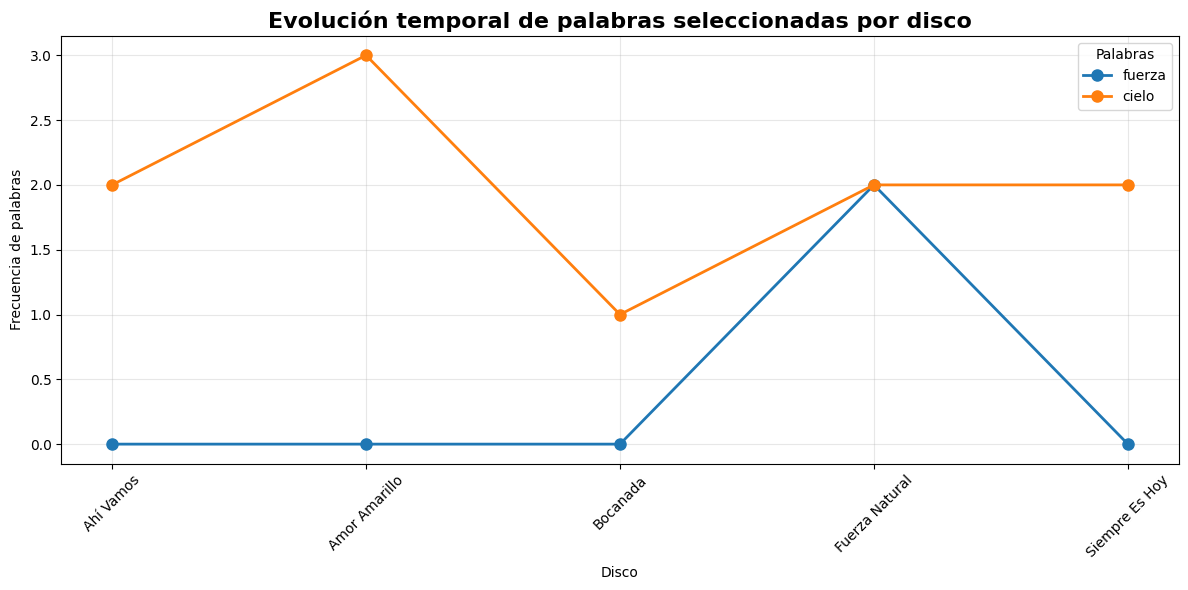

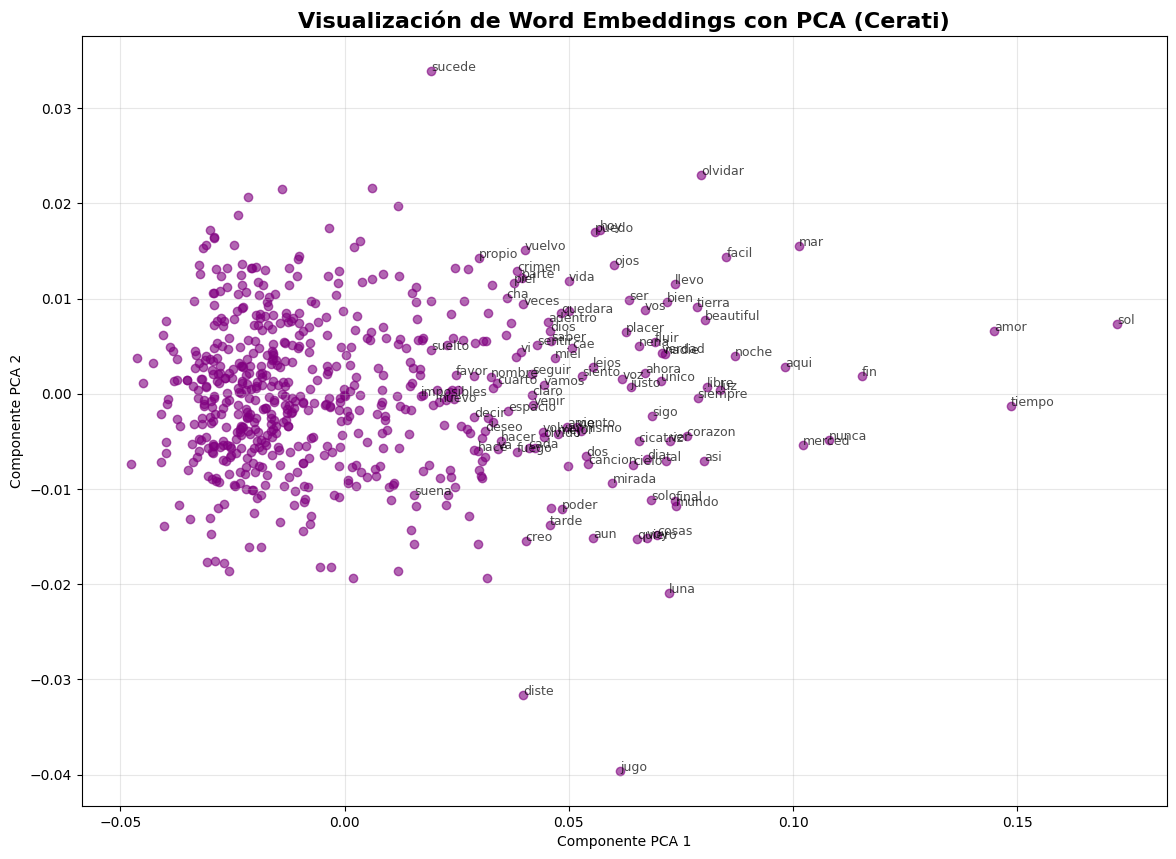

In [142]:
!pip install gensim
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# --- 1. Preparar corpus tokenizado ---
corpus_tokens = [cancion.split() for cancion in discos_dataset["texto_limpio"]]

# --- 2. Entrenar Word2Vec ---
modelo_w2v = Word2Vec(
    sentences=corpus_tokens,
    vector_size=100,   # tamaño de embedding
    window=5,          # contexto
    min_count=2,       # ignora palabras con menos de 2 apariciones
    sg=1,              # 1 = Skip-Gram, 0 = CBOW
    workers=4
)

# --- 3. Extraer embeddings ---
words = list(modelo_w2v.wv.index_to_key)   # palabras del vocabulario
vectors = modelo_w2v.wv[words]             # vectores asociados

# --- 4. Reducir a 2D con PCA ---
pca = PCA(n_components=2)
coords = pca.fit_transform(vectors)

# --- 5. Graficar ---
plt.figure(figsize=(14,10))
plt.scatter(coords[:,0], coords[:,1], c="purple", alpha=0.6)

# Mostrar solo algunas palabras (las más frecuentes)
for i, word in enumerate(words[:100]):  # podés ajustar el número
    plt.annotate(word, (coords[i,0], coords[i,1]), fontsize=9, alpha=0.7)

plt.title("Visualización de Word Embeddings con PCA (Cerati)", fontsize=16, fontweight="bold")
plt.xlabel("Componente PCA 1")
plt.ylabel("Componente PCA 2")
plt.grid(alpha=0.3)
plt.show()


In [150]:
import plotly.express as px
from sklearn.decomposition import PCA
import pandas as pd

# Suponiendo que 'vectors' es tu matriz de embeddings y 'words' la lista de palabras
# Reducir a 3D con PCA
pca = PCA(n_components=3)
coords_3d = pca.fit_transform(vectors)

# Crear un DataFrame para Plotly
df_plot = pd.DataFrame({
    'x': coords_3d[:,0],
    'y': coords_3d[:,1],
    'z': coords_3d[:,2],
    'word': words
})

# Si querés mostrar solo las 100 palabras más frecuentes
df_plot = df_plot.iloc[:100]

# Graficar con Plotly
fig = px.scatter_3d(
    df_plot, x='x', y='y', z='z', text='word',
    color_discrete_sequence=['purple'],
    opacity=0.7
)

# Ajustes de layout
fig.update_traces(marker=dict(size=5))
fig.update_layout(
    title="Visualización 3D de Word Embeddings con PCA (Cerati)",
    scene=dict(
        xaxis_title="PCA 1",
        yaxis_title="PCA 2",
        zaxis_title="PCA 3"
    )
)

fig.show()


In [151]:
# Guardar la gráfica interactiva directamente en tu Google Drive

output_path = "/content/drive/MyDrive/2025/06 - Barreto - Procesamiento del Lenguaje Natural/Git/Trabajo Integrador/grafica_3d_w2v.html"

# Exportar el gráfico como HTML interactivo
fig.write_html(output_path)

print(f"Archivo guardado en: {output_path}")


Archivo guardado en: /content/drive/MyDrive/2025/06 - Barreto - Procesamiento del Lenguaje Natural/Git/Trabajo Integrador/grafica_3d_w2v.html


#Extra: Comparacion con Transformers

In [144]:
from transformers import pipeline

# Cargar pipeline de análisis de sentimientos en español
clasificador = pipeline("sentiment-analysis", model="finiteautomata/beto-sentiment-analysis")

# Ejemplo con una canción
texto = "pones canciones tristes para sentirte mejor" #parte de la cancion Adios, que Textblob calificó como positiva
resultado = clasificador(texto)

print(resultado)


Device set to use cpu


[{'label': 'NEU', 'score': 0.7229814529418945}]


¿Por qué pasa esto con "pones canciones tristes para sentirte mejor"?

La frase tiene la palabra "tristes" (connotación negativa).

Pero también aparece "mejor" (connotación positiva).

En conjunto, el modelo lo interpreta como algo balanceado → neutro.

Esto es una diferencia clave con TextBlob:

TextBlob usa diccionarios de palabras (léxico), por eso se queda con el sesgo de "mejor" → positivo.

BETO está entrenado con contexto y corpus reales en español → puede capturar ambigüedad → neutro.

In [145]:
# Analizar sentimientos con BETO
resultados_beto = [clasificador(t)[0] for t in discos_dataset["texto_limpio"]]

# Guardar en dataframe
df_beto = pd.DataFrame(resultados_beto)
df_beto = pd.concat([discos_dataset[["cancion","disco","año"]].reset_index(drop=True), df_beto], axis=1)

display(df_beto.head())


,cancion,disco,año,label,score
0,Fuerza Natural,Fuerza Natural,2009,NEG,0.989335
1,Deja Vu,Fuerza Natural,2009,NEU,0.994737
2,Magia,Fuerza Natural,2009,NEU,0.796333
3,Amor Sin Rodeos,Fuerza Natural,2009,NEG,0.831451
4,Tracción A Sangre,Fuerza Natural,2009,NEG,0.538855


In [ ]:
from transformers import pipeline
import pandas as pd

# Cargar pipeline de análisis de sentimientos en español
clasificador = pipeline("sentiment-analysis", model="finiteautomata/beto-sentiment-analysis")

# Analizar cada canción del corpus limpio
resultados_beto = []
for cancion, texto in zip(discos_dataset["cancion"], discos_dataset["texto_limpio"]):
    if isinstance(texto, str) and texto.strip():  # evitar NaN o vacíos
        analisis = clasificador(texto[:512])[0]  # BETO acepta máx. 512 tokens
        resultados_beto.append({
            "cancion": cancion,
            "label": analisis["label"],
            "score": analisis["score"]
        })
    else:
        resultados_beto.append({
            "cancion": cancion,
            "label": "NA",
            "score": None
        })

# Convertir a DataFrame
df_beto = pd.DataFrame(resultados_beto)

# Unir con metadata original (ej: disco, año)
df_beto = df_beto.merge(discos_dataset[["cancion","disco","año"]], on="cancion")

display(df_beto.head(10))


In [ ]:
# Elegir la canción
cancion_elegida = "Adios"

# Buscar el texto limpio de esa canción
texto = discos_dataset.loc[discos_dataset["cancion"] == cancion_elegida, "texto_limpio"].values[0]

# Pasar al clasificador BETO
resultado = clasificador(texto[:512])[0]  # corte por límite de tokens
print(f"Canción: {cancion_elegida}")
print(f"Label: {resultado['label']} | Score: {resultado['score']:.3f}")


Eso significa que el modelo BETO clasificó la canción "Adios" como neutral (NEU) con una confianza de ≈62%.

NEU → el texto no tiene un sesgo claro hacia lo positivo o negativo.

Score 0.619 → el modelo está moderadamente seguro de esta predicción.

🔹 Comparación con TextBlob:

TextBlob la había calificado como positiva, porque se fijaba en palabras sueltas como "mejor".

BETO entiende contexto completo: "pones canciones tristes para sentirte mejor" → mezcla de emociones → neutral.

In [ ]:
# Promedio de polaridad por año
polaridad_por_año = df_sentimientos.groupby("año")["Polaridad"].mean()

plt.figure(figsize=(10,5))
plt.plot(polaridad_por_año.index, polaridad_por_año.values, marker="o", color="purple")
plt.title("Evolución del Sentimiento por Año", fontsize=16, fontweight="bold")
plt.xlabel("Año", fontsize=12)
plt.ylabel("Polaridad promedio", fontsize=12)
plt.grid(True)
plt.show()


Canciones más positivas: suelen contener más vocabulario ligado a amor, esperanza o energía

Canciones más negativas: girar en torno a pérdida, tristeza o crítica social

Patrones temporales: se puede ver que en ciertos discos o épocas hay un tono más optimista o más melancólico.

#Sección 6: Conclusiones y Reflexiones

6.1 Hallazgos principales sobre el corpus

Descubrí que ciertas palabras que creía frecuentes en todos los discos (como “amor” o “vida”) tienen una presencia más fuerte en discos específicos, lo que refleja cambios temáticos a lo largo de su carrera.

Se confirmaron hipótesis iniciales sobre la concentración de vocabulario relacionado con emociones y relaciones personales, aunque también surgieron términos inesperados ligados a crítica personal (propia y ajena).

Me sorprendió que algunas canciones con palabras distintas aparecieran muy cercanas en similitud semántica usando embeddings, mostrando relaciones que no se ven con BoW o TF-IDF.

6.2 Comparación de métodos utilizados:

BoW/TF-IDF: útiles para análisis de frecuencia y para identificar términos característicos por canción o disco. Son rápidos y fáciles de interpretar, pero no capturan relaciones semánticas.

Embeddings: más efectivos para detectar similitud semántica entre canciones que usan vocabulario distinto pero con significado parecido. Permiten hacer analogías y análisis de sentimiento más sofisticados.

Ventajas de BoW/TF-IDF: simplicidad, menor requerimiento computacional, fácil visualización.

Desventajas de BoW/TF-IDF: no capturan contexto ni significado.

Ventajas de embeddings: capturan semántica, relaciones implícitas y permiten comparaciones más profundas.

Desventajas de embeddings: requieren más recursos, modelos entrenados y pueden ser más difíciles de interpretar.

6.3 Limitaciones encontradas

No se pudo capturar completamente el tono poético o irónico de algunas letras, ya que ni BoW ni embeddings analizan metáforas profundas o estilo literario.

Algunos matices culturales o referencias externas quedan sin analizar.

Mejoraría la representación de canciones largas, utilizando embeddings contextualizados (tipo BERT) para cada verso, y analizando cambios de tono a nivel de estrofa.

6.4 Aplicaciones potenciales del análisis

Este análisis podría aplicarse en recomendaciones de música, agrupando canciones semánticamente similares o por emoción.

Permite visualizar la evolución temática de un artista a lo largo de su carrera.

Proporciona valor agregado al marketing musical, estudios académicos sobre letras o incluso análisis de tendencias emocionales en la música.

Futuras extensiones podrían incluir detección de temáticas, análisis de sentimiento más profundo, análisis de rimas y métricas poéticas, o integración con audio para correlacionar letra y música.